<table align="left">
  <tr>
    <td><img src="Museum.png" alt="ice cream truck in front of Louvre" width="120"/></td>
    <td align="left"><h1>Lesson 5: Building a Deep Research-like agent</h1></td>
  </tr>
</table>


<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> :</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>

</div>

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Different Run Results:</b> The output generated by AI chat models can vary with each execution due to their dynamic, probabilistic nature. Don't be surprised if your results differ from those shown in the video.</p>

## Set up and test search tools

In [3]:
from tavily import TavilyClient
from smolagents import tool, Tool
import os
from dotenv import load_dotenv

load_dotenv(override=True) # load variables from local .env file

@tool
def web_search(query: str) -> str:
    """Searches the web for your query.

    Args:
        query: Your query
    """
    tavily_client = TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))
    response = tavily_client.search(query)
    return str(response["results"])


class VisitWebpageTool(Tool):
    name = "visit_webpage"
    description = (
        "Visits a webpage at the given url and reads its content as a markdown string. Use this to browse webpages."
    )
    inputs = {
        "url": {
            "type": "string",
            "description": "The url of the webpage to visit.",
        }
    }
    output_type = "string"

    def forward(self, url: str) -> str:
        try:
            import re

            import requests
            from markdownify import markdownify
            from requests.exceptions import RequestException

            from smolagents.utils import truncate_content
        except ImportError as e:
            raise ImportError(
                "You must install packages `markdownify` and `requests` to run this tool: for instance run `pip install markdownify requests`."
            ) from e
        try:
            response = requests.get(url, timeout=20)
            response.raise_for_status()  # Raise an exception for bad status codes
            markdown_content = markdownify(response.text).strip()
            markdown_content = re.sub(r"\n{3,}", "\n\n", markdown_content)
            return truncate_content(markdown_content, 40000)

        except requests.exceptions.Timeout:
            return "The request timed out. Please try again later or check the URL."
        except RequestException as e:
            return f"Error fetching the webpage: {str(e)}"
        except Exception as e:
            return f"An unexpected error occurred: {str(e)}"

print(web_search("What is the melting temperature of vanilla ice cream in °C?"))

[{'title': 'The Sweet Spot: What Temperature Does Ice Cream Start Melting?', 'url': 'https://kitchenjournal.net/what-temperature-does-ice-cream-start-melting/', 'content': 'Ice cream starts melting at a temperature of around 26°F to 30°F (-3°C to -1°C). However, this temperature range can vary depending on the type of ice cream and its ingredients. Some ice creams may start melting at a lower temperature, while others may remain solid for a longer period. The melting point of ice cream also depends on the', 'score': 0.7447496, 'raw_content': None}, {'title': 'What Is the Melting Point of Ice Cream? - Reference.com', 'url': 'https://www.reference.com/science-technology/melting-point-ice-cream-d438071a06dd9e19', 'content': '# What Is the Melting Point of Ice Cream? According to the University of California – Santa Barbra, ice cream will melt at about 31 degrees Fahrenheit or -3 degrees Celsius. The freezing point of water is about 32 degrees Fahrenheit, but the ice cream is affected by t

## Set up an agent

In [4]:
from PIL import Image

from smolagents import CodeAgent, OpenAIServerModel

from huggingface_hub import login

login(os.getenv('HF_API_KEY'))

code_model = "gpt-4.1-mini"

model = OpenAIServerModel(
    #"gpt-4o",
    code_model,  #updated model
    max_completion_tokens=8096,
)

<div style="font-size: 20px; background-color: #fff9b0; padding: 12px; border-left: 4px solid #facc15;">
  <strong>Note:</strong> In the notebook, we reduced the museum count from 10 to 3 to reduce runtime and cost.  
  This will reduce the number of ice cream trucks you will need to buy to start your business!
</div>


In [5]:
#changed to 2024 to avoid decaying internet content
request_museums = """
Could you give me a sorted list of the top 3 museums in the world in 2024,
along with their visitor count (in millions) that year, and the approximate daily temperature
in July at their location ?"""

In [6]:
agent = CodeAgent(
    model=model,
    tools=[web_search, VisitWebpageTool()],
    max_steps=10
)
agent.logger.console.width=66
result = agent.run(request_museums)

╭─────────────────────────── New run ────────────────────────────╮
│                                                                │
│ Could you give me a sorted list of the top 3 museums in the    │
│ world in 2024,                                                 │
│ along with their visitor count (in millions) that year, and    │
│ the approximate daily temperature                              │
│ in July at their location ?                                    │
│                                                                │
╰─ OpenAIServerModel - gpt-4.1-mini ─────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  # Search for the top museums by visitor count in 2024           
  top_museums_2024 = web_search(query="top museums in the world   
  by visitor count 2024")                                         
  print(top_museums_2024)                                         
 ────────────────────────────────────────────────────────────────

Execution logs:
[{'title': 'List of most-visited museums - Wikipedia', 'url': 
'https://en.wikipedia.org/wiki/List_of_most-visited_museums', 
'content': "List of most-visited museums This is a list of the 
most-visited museums in the world in 2024 or 2023 by annual 
attendance statistics. Contents Most-visited museums in 2024 Name 
| Visitors in 2024 | City | Country Louvre | 8,700,000 (2024)[1] |
Paris | France Vatican Museums | 6,825,436 (2024)[2] | Vatican 
City,Rome | Vatican National Museum of China | 6,3 million (as of 
November 28, 2024)[3] | Beijing | China British Museum | 6,479,952
(2024)[4] | London | United Kingdom Natural History Museum, South 
Kensington | 6,301,972 (2024)[5] | London | United Kingdom 
Metropolitan Museum of Art | 5,727,258 (2024)[6] | New York City |
United States American Museum of Natural History | 5,400,000 
(2024) | New York City | United States China Science and 
Technology Museum | 5,315,000 (2023)[7] | Beijing | China Galleria
degli Uffizi | 2,908,828 (2024)[8] | Florence | Italy Nanjing 
Museum | 5,007,000 (2023)[9] | Nanjing | China Musée d'Orsay | 
3,751,000 (includingMusée de l'Orangerie) (2024)[10] | Paris | 
France Suzhou Museum | 4,852,000 (2023)[7] | Suzhou | China Tate 
Modern | 4,603,025 (2024)[11] | London | United Kingdom National 
Museum of Natural History | 4,400,000 (2023)[12] | Washington, 
D.C. | United States National Museum of Korea | 4.18 million 
(2023)[13] | Seoul | South Korea Guangdong Museum | 4,000,000 
(2023)[14] | Guangzhou | China National Gallery of Art | 3,936,543
(2024)[15] | Washington, D.C. | United States Musée National 
d'Histoire Naturelle | 3.8 million (2023)[16] | Paris | France 
State Hermitage Museum | 3,563,590 (2024)[17] | Saint Petersburg |
Russia Prado Museum | 3,457,057 (2024)[18]> | Madrid | Spain 
Palace and Garden of Sa'dabad | 3,121,000 (2022)[19] | Tehran | 
Iran Victoria and Albert Museum | 3,525,700 (2024)[20] | London, 
South Kensington | United Kingdom National Air and Space Museum[a]
| 3,100,000 (2024)[21] | Washington, D.C. | United States National
Gallery | 3,203,451 (2024)[22] | London | United Kingdom National 
Museum of Natural Science | 2,854,455 (2024)[23] | Taichung | 
Taiwan Museum of Modern Art | 2,839,509 (2023)[24] | New York City
| United States National Museum of Anthropology | 3,700,000 (2024)
| Mexico City | Mexico Centre Pompidou | 3,204,369 (2024)[25] | 
Paris | France Museo Nacional de Historia | 2,456,825 (2023) | 
Mexico City | Mexico Golestan Palace | 2,106,603 (2022)[19] | 
Tehran | Iran Smithsonian Museum of American History | 2,100,000 
(2024)[12] | Washington, D.C. | United States Galleria 
dell'Accademia | 2,013,914 (2023)[26] | Florence | Italy National 
Museum in Warsaw | 2,000,000 (2022)[27] | Warsaw | Poland 
Guggenheim Museum Bilbao | 1,324,000 (2023)[28] | Bilbao | Spain 
Mevlana Museum | 3,352,505 (2022)[29] | Konya | Turkey State 
Russian Museum | 2,900,000 (2023)[30] | Saint Petersburg | Russia 
National Museum of Marine Science and Technology | 2,726,000 
(2023)[31] | Keelung | Taiwan London Science Museum | 2,827,242 
(2024)[32] | London | United Kingdom M+ | 2,798,000 (2023)[33] | 
Hong Kong | Hong Kong National Museum of Nature and Science | 
2,694,021 (2023)[34] | Tokyo | Japan Chinese Aviation Museum | 
2,300,000 (2022)[35] | Beijing | China Topography of Terror | 
2,100,000 (2022)[36] | Berlin | Germany Cité des Sciences et de 
l'Industrie | 1,992,823[37] | Paris | France National Museum of 
Scotland | 2,314,974 (2024)[38] | Edinburgh | United Kingdom State
Tretyakov Gallery | 2,100,000 (2023)[39] | Moscow | Russia 
National Science and Technology Museum | 1,875,372[40] | Kaohsiung
| Taiwan National Museum of Modern and Contemporary Art | 
1,806,641[41] | Seoul | South Korea Rijksmuseum | 2,702,824 
(2023)[42] | Amsterdam | Netherlands National Palace Museum | 
1,874,994 (2024)[43] | Taipei | Taiwan Belvedere | 1,834,000 
(2023)[44] | Vienna | Austria National Gallery Singapore | 
1,723,916 

[Step 1: Duration 7.56 seconds| Input tokens: 2,097 | Output 
tokens: 152]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  # Look up average daily temperature in July for Paris, Vatican  
  City (Rome), and Beijing                                        
  temp_paris = web_search(query="average daily temperature in     
  July Paris")                                                    
  temp_vatican_rome = web_search(query="average daily             
  temperature in July Vatican City Rome")                         
  temp_beijing = web_search(query="average daily temperature in   
  July Beijing")                                                  
                                                                  
  print(f"Paris July temperature: {temp_paris}")                  
  print(f"Vatican City (Rome) July temperature:                   
  {temp_vatican_rome}")                                           
  print(f"Beijing July temperature: {temp_beijing}")              
 ────────────────────────────────────────────────────────────────

Execution logs:
Paris July temperature: [{'title': 'Paris July Weather, Average 
Temperature (France) - Weather Spark', 'url': 
'https://weatherspark.com/m/47913/7/Average-Weather-in-July-in-Par
is-France', 'content': '| Full 
YearMayTodaySpringSummerFallWinterJanFebMarAprMayJunJulAugSepOctNo
vDec12345678910111213141516171819202122232425262728293031July 
Weather in ParisFranceDaily high temperaturesincreaseby4Â°F, 
from74Â°Fto77Â°F, rarely falling below64Â°For exceeding88Â°F.Daily
low temperaturesincreaseby2Â°F, from57Â°Fto59Â°F, rarely falling 
below51Â°For exceeding66Â°F. Compare Paris to another city: Clouds
The month of July in Paris experiences essentially constant cloud 
cover, with the percentage of time that the sky is overcast or 
mostly cloudy remaining about 40% throughout the month. Average 
Monthly Rainfall in July in Paris Sun Over the course of July in 
Paris, the length of the day is decreasing. The average hourly 
wind speed in Paris is gradually decreasing during July, 
decreasing from 8.7 miles per hour to 8.0 miles per hour over the 
course of the month.', 'score': 0.9307171, 'raw_content': None}, 
{'title': 'July weather - Summer 2025 - Paris, France', 'url': 
'https://www.weather-atlas.com/en/france/paris-weather-july', 
'content': 'July weather - Summer 2025 - Paris, France Weather 
Atlas Search countries and cities Countries Units °Celsius 
°Fahrenheit Languages english español 中文 Contact Contact About 
Us Glossary Terms of Use Privacy policy Cookies Policy Disclaimer 
Countries France Paris Climate July July weather forecast Paris, 
France Today Tomorrow Long-term YearJFMAMJJulyASOND Expand 
Contents Weather in July Frequently asked questions Average 
temperature in July Average pressure in July Average wind speed in
July Average humidity in July Average rainfall in July Average 
rainfall days in July Average snowfall in July Average snowfall 
days in July Average daylight in July Average sunshine in July 
Average sunshine days in July Average UV index in July Average 
cloud cover in July Average visibility in July The Eiffel Tower in
Paris, France viewed from River Seine July Weather in July July is
typically the warmest month in Paris, with the summer heat in full
swing. With high temperatures reaching up to 24.6°C (76.3°F), July
experiences the longest daily sunshine duration of the year, 
averaging 9.1 hours. Temperature July, with its average 
high-temperature of 24.6°C (76.3°F) and an average low-temperature
of 14.8°C (58.6°F), holds the record as the warmest month in 
Paris. Rainfall In Paris, France, in July, during 14.8 rainfall 
days, 36mm (1.42") of precipitation is typically accumulated.', 
'score': 0.90985113, 'raw_content': None}, {'title': 'Paris 
Weather in July: What to Expect and Packing Tips - Paris Travel 
Guide', 'url': 
'https://www.parisdiscoveryguide.com/weather-in-paris-in-july.html
', 'content': "Plan Your Trip Flights to Paris Travel Insurance 
Paris Weather Skip-the-Line Tickets Paris Museum Pass 1st Day in 
Paris: What to Do Paris Travel Q and A See Top Attractions 10 Top 
Attractions Eiffel Tower Louvre Museum Palace of Versailles What 
to See & Do at Versailles Versailles Palace Tours Where to Stay 
near Versailles Getting from Paris to Versailles Arc de Triomphe 
Best Paris Skyline Views Hidden Gems Pere Lachaise Cemetery 
Conciergerie Arenes de Lutece Covered Passages Eglise 
Saint-Germain-des-Prés Famous Neighborhoods Ile de la Cite 
Arrondissement Guide & Map Museums and Monuments Orsay Museum 
Sainte-Chapelle Fun Museums for All Ages Museums and Monuments 
Guide Parks and Gardens Marais Gardens Arenes de Lutece Do See and
Do Paris Beaches Museum Exhibitions Christmas Lights & Decorations
Where to See Cherry Blossoms Best Things to Do in February Best 
Things to Do in April Entertainment Paris Concerts Paris Tours 
Food Tours Bike Tours Day Trips from Paris Paris Shopping Guide 
Summer and Winter Sales Les Puces Flea Market Events Events Each 
Month Chinese New Year P

[Step 2: Duration 12.69 seconds| Input tokens: 8,832 | Output 
tokens: 401]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  top_museums_info = [                                            
      {"name": "Louvre", "city": "Paris", "country": "France",    
  "visitors_millions": 8.7, "average_july_temp_c": 20},           
      {"name": "Vatican Museums", "city": "Vatican City (Rome)",  
  "country": "Vatican", "visitors_millions": 6.825,               
  "average_july_temp_c": 24},                                     
      {"name": "National Museum of China", "city": "Beijing",     
  "country": "China", "visitors_millions": 6.3,                   
  "average_july_temp_c": 26.5}                                    
  ]                                                               
                                                                  
  # Sort by visitors count descending (though already sorted)     
  top_museums_info_sorted = sorted(top_museums_info, key=lambda   
  x: x['visitors_millions'], reverse=True)                        
                                                                  
  print(top_museums_info_sorted)                                  
 ────────────────────────────────────────────────────────────────

Execution logs:
[{'name': 'Louvre', 'city': 'Paris', 'country': 'France', 
'visitors_millions': 8.7, 'average_july_temp_c': 20}, {'name': 
'Vatican Museums', 'city': 'Vatican City (Rome)', 'country': 
'Vatican', 'visitors_millions': 6.825, 'average_july_temp_c': 24},
{'name': 'National Museum of China', 'city': 'Beijing', 'country':
'China', 'visitors_millions': 6.3, 'average_july_temp_c': 26.5}]

Out: None

[Step 3: Duration 6.52 seconds| Input tokens: 20,132 | Output 
tokens: 738]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  answer_text = (                                                 
      "Top 3 Museums in the World in 2024:\n"                     
      "1. Louvre, Paris, France - 8.7 million visitors; Approx.   
  July daily temperature: 20°C\n"                                 
      "2. Vatican Museums, Vatican City (Rome), Vatican - 6.825   
  million visitors; Approx. July daily temperature: 24°C\n"       
      "3. National Museum of China, Beijing, China - 6.3 million  
  visitors; Approx. July daily temperature: 26.5°C\n"             
  )                                                               
  final_answer(answer_text)                                       
 ────────────────────────────────────────────────────────────────

Out - Final answer: Top 3 Museums in the World in 2024:
1. Louvre, Paris, France - 8.7 million visitors; Approx. July 
daily temperature: 20°C
2. Vatican Museums, Vatican City (Rome), Vatican - 6.825 million 
visitors; Approx. July daily temperature: 24°C
3. National Museum of China, Beijing, China - 6.3 million 
visitors; Approx. July daily temperature: 26.5°C

[Step 4: Duration 4.49 seconds| Input tokens: 32,179 | Output 
tokens: 914]

In [8]:
#modified code to handle case where agent doesn't return a python list.
import pandas as pd

try:
    display(pd.DataFrame(result))
except Exception as e:
    print("Could not display as DataFrame:", e)
    print(result)

Could not display as DataFrame: DataFrame constructor not properly called!
Top 3 Museums in the World in 2024:
1. Louvre, Paris, France - 8.7 million visitors; Approx. July daily temperature: 20°C
2. Vatican Museums, Vatican City (Rome), Vatican - 6.825 million visitors; Approx. July daily temperature: 24°C
3. National Museum of China, Beijing, China - 6.3 million visitors; Approx. July daily temperature: 26.5°C



## Create a multi-agent researcher
### Start with web search agent

In [9]:
web_agent = CodeAgent(
    model=OpenAIServerModel(
        #"gpt-4o",
        code_model,  # updated model
        max_completion_tokens=8096,
    ),
    tools=[web_search, VisitWebpageTool()],
    max_steps=10,
    name="web_agent",
    description="Runs web searches for you."
)
web_agent.logger.console.width=66

### Setup manager agent

In [10]:
from smolagents import Tool
from typing import Any
from smolagents.utils import make_image_url, encode_image_base64

def check_reasoning_and_plot(final_answer, agent_memory):
    final_answer
    multimodal_model = OpenAIServerModel(
        "gpt-4o",
    )
    filepath = "saved_map.png"
    assert os.path.exists(filepath), "Make sure to save the plot under saved_map.png!"
    image = Image.open(filepath)
    prompt = (
        f"Here is a user-given task and the agent steps: {agent_memory.get_succinct_steps()}. Now here is the plot that was made."
        "Please check that the reasoning process and plot are correct: do they correctly answer the given task?"
        "First list reasons why yes/no, then write your final decision: PASS in caps lock if it is satisfactory, FAIL if it is not."
        "Don't be harsh: if the plot mostly solves the task, it should pass."
        "To pass, a plot should be made using px.scatter_map and not any other method (scatter_map looks nicer)."
        "Also, any run that invents numbers should fail."
    )
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": prompt,
                },
                {
                    "type": "image_url",
                    "image_url": {"url": make_image_url(encode_image_base64(image))},
                },
            ],
        }
    ]
    output = multimodal_model(messages).content
    print("Feedback: ", output)
    if "FAIL" in output:
        raise Exception(output)
    return True


manager_agent = CodeAgent(
    model=OpenAIServerModel(
        #"gpt-4o",
        code_model,
        max_tokens=8096,
    ),
    tools=[],
    managed_agents=[web_agent],
    additional_authorized_imports=[
        "geopandas",
        "plotly",
        "plotly.express",  #added
        "plotly.express.colors",  #added
        "shapely",
        "json",
        "pandas",
        "numpy",
    ],
    planning_interval=5,
    verbosity_level=2,
    final_answer_checks=[check_reasoning_and_plot],
    max_steps=15,
)
manager_agent.logger.console.width=66

In [11]:
manager_agent.visualize()

CodeAgent | gpt-4.1-mini
├── ✅ Authorized imports: ['geopandas', 'plotly', 
│   'plotly.express', 'plotly.express.colors', 'shapely', 'json', 
│   'pandas', 'numpy']
├── 🛠️ Tools:
│   ┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
│   ┃ Name         ┃ Description          ┃ Arguments            ┃
│   ┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│   │ final_answer │ Provides a final     │ answer (`any`): The  │
│   │              │ answer to the given  │ final answer to the  │
│   │              │ problem.             │ problem              │
│   └──────────────┴──────────────────────┴──────────────────────┘
└── 🤖 Managed agents:
    └── web_agent | CodeAgent | gpt-4.1-mini
        ├── ✅ Authorized imports: []
        ├── 📝 Description: Runs web searches for you.
        └── 🛠️ Tools:
            ┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
            ┃ Name          ┃ Description      ┃ Arguments       ┃
            ┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
            │ web_search    │ Searches the web │ query           │
            │               │ for your query.  │ (`string`):     │
            │               │                  │ Your query      │
            │ visit_webpage │ Visits a webpage │ url (`string`): │
            │               │ at the given url │ The url of the  │
            │               │ and reads its    │ webpage to      │
            │               │ content as a     │ visit.          │
            │               │ markdown string. │                 │
            │               │ Use this to      │                 │
            │               │ browse webpages. │                 │
            │ final_answer  │ Provides a final │ answer (`any`): │
            │               │ answer to the    │ The final       │
            │               │ given problem.   │ answer to the   │
            │               │                  │ problem         │
            └───────────────┴──────────────────┴─────────────────┘

In [12]:
# added this code, remove plot file if exits.
import os
os.path.exists("saved_map.png") and os.remove("saved_map.png")

False

In [13]:
manager_agent.run(f"""
{request_museums}

Then make me a spatial map of the world using px.scatter_map, with the biggest museums 
represented as scatter points of size depending on visitor count and color depending 
on the average temperature in July.
Save the map to saved_map.png, then return it!

Here's an example of how to plot and return a map:
import plotly.express as px
df = px.data.carshare()
fig = px.scatter_map(df, lat="centroid_lat", lon="centroid_lon", text="name", color="peak_hour",
     color_continuous_scale=px.colors.sequential.Magma_r, size_max=15, zoom=1)
fig.show()
final_answer(fig)

Do not invent any numbers! You must only use numbers sourced from the internet.
""")

╭─────────────────────────── New run ────────────────────────────╮
│                                                                │
│ Could you give me a sorted list of the top 3 museums in the    │
│ world in 2024,                                                 │
│ along with their visitor count (in millions) that year, and    │
│ the approximate daily temperature                              │
│ in July at their location ?                                    │
│                                                                │
│ Then make me a spatial map of the world using px.scatter_map,  │
│ with the biggest museums                                       │
│ represented as scatter points of size depending on visitor     │
│ count and color depending                                      │
│ on the average temperature in July.                            │
│ Save the map to saved_map.png, then return it!                 │
│                                                                │
│ Here's an example of how to plot and return a map:             │
│ import plotly.express as px                                    │
│ df = px.data.carshare()                                        │
│ fig = px.scatter_map(df, lat="centroid_lat",                   │
│ lon="centroid_lon", text="name", color="peak_hour",            │
│      color_continuous_scale=px.colors.sequential.Magma_r,      │
│ size_max=15, zoom=1)                                           │
│ fig.show()                                                     │
│ final_answer(fig)                                              │
│                                                                │
│ Do not invent any numbers! You must only use numbers sourced   │
│ from the internet.                                             │
│                                                                │
╰─ OpenAIServerModel - gpt-4.1-mini ─────────────────────────────╯

────────────────────────── Initial plan ──────────────────────────
Here are the facts I know and the plan of action that I will 
follow to solve the task:
```
---
## Facts survey
### 1.1. Facts given in the task
- We need a sorted list of the top 3 museums in the world in 2024 
by visitor count.
- We need the visitor count (in millions) for each of these 
museums in 2024.
- We need the approximate daily temperature in July at the 
location of each museum.
- We need to create a spatial map using plotly.express's 
px.scatter_map with:
  - Scatter points representing these museums.
  - Size of scatter points depending on visitor count.
  - Color of scatter points depending on average July temperature.
- The map should be saved as saved_map.png and returned.
- An example snippet of how to plot and return the map is 
provided.
- Do not invent or assume numbers; only use numbers sourced from 
the internet.

### 1.2. Facts to look up
- The top 3 museums worldwide in 2024 by visitor count. This 
needs:
  - Names of the museums.
  - Visitor counts in 2024, in millions.
- The geographic location (latitude and longitude) of the top 3 
museums.
- The approximate daily temperature in July at each museum’s 
location (average daily temperature).

Sources for these facts:
- Reputable museum industry reports or statistics websites for 
2024 visitor numbers (e.g., The Art Newspaper, TEA/AECOM Museum 
Index, official museum websites, or authoritative news sources).
- Museum official websites or trusted databases (e.g., Wikipedia, 
Google Maps) for geographic coordinates.
- Weather/climate data websites (e.g., NOAA, World Weather Online,
Weatherbase) or reliable climate databases to retrieve average 
July temperatures by city/location.

### 1.3. Facts to derive
- Sort the top 3 museums by visitor count (descending).
- Extract or convert visitor counts into millions if necessary.
- Approximate daily temperature in July might require averaging 
reported monthly high/low temperatures or using reported averages.
- Determine latitude and longitude for the museums if only city 
names or addresses are found.
- Construct a dataframe suitable for px.scatter_map including:
  - latitude, longitude,
  - name (for labeling),
  - visitor count (for size),
  - temperature (for color).
- Construct px.scatter_map with appropriate scaling and coloring 
parameters.
- Save the generated map to a PNG file.

## Plan
1. Search the internet for 2024 data on the top museums worldwide 
by visitor counts. Collect the names and exact visitor numbers 
(millions) for the top 3.
2. Look up the precise geographic locations (latitude and 
longitude) of these museums.
3. Look up or calculate the average daily temperature in July for 
each museum’s location.
4. Organize the collected data into a structured table or 
dataframe.
5. Sort the museums by visitor count descending.
6. Use plotly.express’s px.scatter_map function to create a 
spatial map plotting these museums.
   - Set scatter point size relative to visitor count.
   - Set scatter point color based on average July temperature.
   - Add labels with the museum names.
7. Save the map to saved_map.png.
8. Return the generated map using the appropriate function.


```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: I need to collect information on the top 3 museums       
worldwide in 2024 by visitor count along with their visitor       
numbers, then gather geographical location and July temperature   
data. First, I will search the internet for the top museums       
worldwide in 2024 by visitors.                                    
                                                                  
Code:                                                             
```py                                                             
# Let's task the web_agent to perform the search for the top 3    
museums in the world in 2024 by visitor count,                    
# since we need the most updated and accurate data from the       
internet.                                                         
task = (                                                          
    "Please find the top 3 museums worldwide in 2024 ranked by    
annual visitor count. "                                           
    "For each museum, provide its name, visitor count in millions 
for 2024, city and country of location. "                         
    "Please provide the result in a structured manner so that I   
can use the data for further processing."                         
)                                                                 
print(task)                                                       
```<end_code>                                                     

─ Executing parsed code: ─────────────────────────────────────── 
  # Let's task the web_agent to perform the search for the top 3  
  museums in the world in 2024 by visitor count,                  
  # since we need the most updated and accurate data from the     
  internet.                                                       
  task = (                                                        
      "Please find the top 3 museums worldwide in 2024 ranked by  
  annual visitor count. "                                         
      "For each museum, provide its name, visitor count in        
  millions for 2024, city and country of location. "              
      "Please provide the result in a structured manner so that   
  I can use the data for further processing."                     
  )                                                               
  print(task)                                                     
 ────────────────────────────────────────────────────────────────

Execution logs:
Please find the top 3 museums worldwide in 2024 ranked by annual 
visitor count. For each museum, provide its name, visitor count in
millions for 2024, city and country of location. Please provide 
the result in a structured manner so that I can use the data for 
further processing.

Out: None

[Step 1: Duration 19.33 seconds| Input tokens: 2,964 | Output 
tokens: 181]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: I have requested the task for the web_agent but did not  
yet directly ask it to run a web search. I will do that now to get
the exact data for the top 3 museums in 2024 by visitor count     
including their location information.                             
                                                                  
Code:                                                             
```py                                                             
# Now I will request the web_agent member to search the top 3     
museums with their visitor count and location.                    
# This is to get valid data to proceed with temperature and       
geographic coordinates.                                           
top_museums_search_query = (                                      
    "Top 3 museums in the world by visitor count in 2024 with     
their visitor numbers and location (city, country)"               
)                                                                 
print(top_museums_search_query)                                   
```<end_code>                                                     

─ Executing parsed code: ─────────────────────────────────────── 
  # Now I will request the web_agent member to search the top 3   
  museums with their visitor count and location.                  
  # This is to get valid data to proceed with temperature and     
  geographic coordinates.                                         
  top_museums_search_query = (                                    
      "Top 3 museums in the world by visitor count in 2024 with   
  their visitor numbers and location (city, country)"             
  )                                                               
  print(top_museums_search_query)                                 
 ────────────────────────────────────────────────────────────────

Execution logs:
Top 3 museums in the world by visitor count in 2024 with their 
visitor numbers and location (city, country)

Out: None

[Step 2: Duration 4.17 seconds| Input tokens: 6,355 | Output 
tokens: 325]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: I need to explicitly ask the web_agent team member to run
a web search and return the results for the top 3 museums in the  
world by visitor count for 2024, including visitor numbers and    
location. I will give a detailed instruction to the web_agent to  
perform this search.                                              
                                                                  
Code:                                                             
```py                                                             
# Ask the web_agent to search for the top 3 museums by visitor    
count in 2024.                                                    
# The goal is to get name, visitor count (millions), city and     
country.                                                          
task_for_web_agent = (                                            
    "Search the internet for the top 3 museums in the world by    
visitor count for the year 2024. "                                
    "For each museum, provide the following details in a clear and
structured format: the museum's name, "                           
    "the visitor count in millions in 2024, and the city and      
country where the museum is located. "                            
    "Please provide precise numbers and locations without         
inventing or estimating data. "                                   
    "Return the information as a list or table to facilitate      
further processing."                                              
)                                                                 
print(task_for_web_agent)                                         
```<end_code>                                                     

─ Executing parsed code: ─────────────────────────────────────── 
  # Ask the web_agent to search for the top 3 museums by visitor  
  count in 2024.                                                  
  # The goal is to get name, visitor count (millions), city and   
  country.                                                        
  task_for_web_agent = (                                          
      "Search the internet for the top 3 museums in the world by  
  visitor count for the year 2024. "                              
      "For each museum, provide the following details in a clear  
  and structured format: the museum's name, "                     
      "the visitor count in millions in 2024, and the city and    
  country where the museum is located. "                          
      "Please provide precise numbers and locations without       
  inventing or estimating data. "                                 
      "Return the information as a list or table to facilitate    
  further processing."                                            
  )                                                               
  print(task_for_web_agent)                                       
 ────────────────────────────────────────────────────────────────

Execution logs:
Search the internet for the top 3 museums in the world by visitor 
count for the year 2024. For each museum, provide the following 
details in a clear and structured format: the museum's name, the 
visitor count in millions in 2024, and the city and country where 
the museum is located. Please provide precise numbers and 
locations without inventing or estimating data. Return the 
information as a list or table to facilitate further processing.

Out: None

[Step 3: Duration 4.08 seconds| Input tokens: 10,064 | Output 
tokens: 549]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: I mistakenly printed the instructions for the web_agent  
instead of actually instructing the web_agent to perform the      
search. I now need to directly request the web_agent to perform   
the search with the detailed task description.                    
                                                                  
Code:                                                             
```py                                                             
# Now actually call the web_agent with the task, asking it to     
perform the search and provide the details.                       
task = (                                                          
    "You are a web search agent. Search for the top 3 museums     
worldwide by visitor count in 2024. "                             
    "Provide a structured list of these museums with their name,  
visitor count in 2024 (millions), city, and country. "            
    "This data should be accurate and sourced from the internet." 
)                                                                 
print(task)                                                       
```<end_code>                                                     

─ Executing parsed code: ─────────────────────────────────────── 
  # Now actually call the web_agent with the task, asking it to   
  perform the search and provide the details.                     
  task = (                                                        
      "You are a web search agent. Search for the top 3 museums   
  worldwide by visitor count in 2024. "                           
      "Provide a structured list of these museums with their      
  name, visitor count in 2024 (millions), city, and country. "    
      "This data should be accurate and sourced from the          
  internet."                                                      
  )                                                               
  print(task)                                                     
 ────────────────────────────────────────────────────────────────

Execution logs:
You are a web search agent. Search for the top 3 museums worldwide
by visitor count in 2024. Provide a structured list of these 
museums with their name, visitor count in 2024 (millions), city, 
and country. This data should be accurate and sourced from the 
internet.

Out: None

[Step 4: Duration 2.85 seconds| Input tokens: 14,312 | Output 
tokens: 699]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: I mistakenly printed the instructions again instead of   
actually calling the web_agent. Now I will directly call the      
web_agent tool with the task argument so it performs the search   
and returns the data.                                             
                                                                  
Code:                                                             
```py                                                             
# Call the web_agent with the task argument to run the actual     
search for top 3 museums by visitor count in 2024.                
result = web_agent(task=(                                         
    "Search for the top 3 museums worldwide by visitor count in   
2024. Provide a structured list of these museums "                
    "with their name, visitor count in millions in 2024, city, and
country. Provide factual data sourced from reliable sites."       
))                                                                
print(result)                                                     
```<end_code>                                                     

─ Executing parsed code: ─────────────────────────────────────── 
  # Call the web_agent with the task argument to run the actual   
  search for top 3 museums by visitor count in 2024.              
  result = web_agent(task=(                                       
      "Search for the top 3 museums worldwide by visitor count    
  in 2024. Provide a structured list of these museums "           
      "with their name, visitor count in millions in 2024, city,  
  and country. Provide factual data sourced from reliable         
  sites."                                                         
  ))                                                              
  print(result)                                                   
 ────────────────────────────────────────────────────────────────

╭───────────────────── New run - web_agent ──────────────────────╮
│                                                                │
│ You're a helpful agent named 'web_agent'.                      │
│ You have been submitted this task by your manager.             │
│ ---                                                            │
│ Task:                                                          │
│ Search for the top 3 museums worldwide by visitor count in     │
│ 2024. Provide a structured list of these museums with their    │
│ name, visitor count in millions in 2024, city, and country.    │
│ Provide factual data sourced from reliable sites.              │
│ ---                                                            │
│ You're helping your manager solve a wider task: so make sure   │
│ to not provide a one-line answer, but give as much information │
│ as possible to give them a clear understanding of the answer.  │
│                                                                │
│ Your final_answer WILL HAVE to contain these parts:            │
│ ### 1. Task outcome (short version):                           │
│ ### 2. Task outcome (extremely detailed version):              │
│ ### 3. Additional context (if relevant):                       │
│                                                                │
│ Put all these in your final_answer tool, everything that you   │
│ do not pass as an argument to final_answer will be lost.       │
│ And even if your task resolution is not successful, please     │
│ return as much context as possible, so that your manager can   │
│ act upon this feedback.                                        │
│                                                                │
╰─ OpenAIServerModel - gpt-4.1-mini ─────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  search_result = web_search(query="top museums worldwide by      
  visitor count 2024")                                            
  print(search_result)                                            
 ────────────────────────────────────────────────────────────────

Execution logs:
[{'title': 'List of most-visited museums - Wikipedia', 'url': 
'https://en.wikipedia.org/wiki/List_of_most-visited_museums', 
'content': "List of most-visited museums This is a list of the 
most-visited museums in the world in 2024 or 2023 by annual 
attendance statistics. Contents Most-visited museums in 2024 Name 
| Visitors in 2024 | City | Country Louvre | 8,700,000 (2024)[1] |
Paris | France Vatican Museums | 6,825,436 (2024)[2] | Vatican 
City,Rome | Vatican National Museum of China | 6,3 million (as of 
November 28, 2024)[3] | Beijing | China British Museum | 6,479,952
(2024)[4] | London | United Kingdom Natural History Museum, South 
Kensington | 6,301,972 (2024)[5] | London | United Kingdom 
Metropolitan Museum of Art | 5,727,258 (2024)[6] | New York City |
United States American Museum of Natural History | 5,400,000 
(2024) | New York City | United States China Science and 
Technology Museum | 5,315,000 (2023)[7] | Beijing | China Galleria
degli Uffizi | 2,908,828 (2024)[8] | Florence | Italy Nanjing 
Museum | 5,007,000 (2023)[9] | Nanjing | China Musée d'Orsay | 
3,751,000 (includingMusée de l'Orangerie) (2024)[10] | Paris | 
France Suzhou Museum | 4,852,000 (2023)[7] | Suzhou | China Tate 
Modern | 4,603,025 (2024)[11] | London | United Kingdom National 
Museum of Natural History | 4,400,000 (2023)[12] | Washington, 
D.C. | United States National Museum of Korea | 4.18 million 
(2023)[13] | Seoul | South Korea Guangdong Museum | 4,000,000 
(2023)[14] | Guangzhou | China National Gallery of Art | 3,936,543
(2024)[15] | Washington, D.C. | United States Musée National 
d'Histoire Naturelle | 3.8 million (2023)[16] | Paris | France 
State Hermitage Museum | 3,563,590 (2024)[17] | Saint Petersburg |
Russia Prado Museum | 3,457,057 (2024)[18]> | Madrid | Spain 
Palace and Garden of Sa'dabad | 3,121,000 (2022)[19] | Tehran | 
Iran Victoria and Albert Museum | 3,525,700 (2024)[20] | London, 
South Kensington | United Kingdom National Air and Space Museum[a]
| 3,100,000 (2024)[21] | Washington, D.C. | United States National
Gallery | 3,203,451 (2024)[22] | London | United Kingdom National 
Museum of Natural Science | 2,854,455 (2024)[23] | Taichung | 
Taiwan Museum of Modern Art | 2,839,509 (2023)[24] | New York City
| United States National Museum of Anthropology | 3,700,000 (2024)
| Mexico City | Mexico Centre Pompidou | 3,204,369 (2024)[25] | 
Paris | France Museo Nacional de Historia | 2,456,825 (2023) | 
Mexico City | Mexico Golestan Palace | 2,106,603 (2022)[19] | 
Tehran | Iran Smithsonian Museum of American History | 2,100,000 
(2024)[12] | Washington, D.C. | United States Galleria 
dell'Accademia | 2,013,914 (2023)[26] | Florence | Italy National 
Museum in Warsaw | 2,000,000 (2022)[27] | Warsaw | Poland 
Guggenheim Museum Bilbao | 1,324,000 (2023)[28] | Bilbao | Spain 
Mevlana Museum | 3,352,505 (2022)[29] | Konya | Turkey State 
Russian Museum | 2,900,000 (2023)[30] | Saint Petersburg | Russia 
National Museum of Marine Science and Technology | 2,726,000 
(2023)[31] | Keelung | Taiwan London Science Museum | 2,827,242 
(2024)[32] | London | United Kingdom M+ | 2,798,000 (2023)[33] | 
Hong Kong | Hong Kong National Museum of Nature and Science | 
2,694,021 (2023)[34] | Tokyo | Japan Chinese Aviation Museum | 
2,300,000 (2022)[35] | Beijing | China Topography of Terror | 
2,100,000 (2022)[36] | Berlin | Germany Cité des Sciences et de 
l'Industrie | 1,992,823[37] | Paris | France National Museum of 
Scotland | 2,314,974 (2024)[38] | Edinburgh | United Kingdom State
Tretyakov Gallery | 2,100,000 (2023)[39] | Moscow | Russia 
National Science and Technology Museum | 1,875,372[40] | Kaohsiung
| Taiwan National Museum of Modern and Contemporary Art | 
1,806,641[41] | Seoul | South Korea Rijksmuseum | 2,702,824 
(2023)[42] | Amsterdam | Netherlands National Palace Museum | 
1,874,994 (2024)[43] | Taipei | Taiwan Belvedere | 1,834,000 
(2023)[44] | Vienna | Austria National Gallery Singapore | 
1,723,916 

[Step 1: Duration 5.66 seconds| Input tokens: 2,256 | Output 
tokens: 122]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  museums_top3 = [                                                
      {"name": "Louvre", "visitor_count_millions_2024": 8.7,      
  "city": "Paris", "country": "France"},                          
      {"name": "Vatican Museums", "visitor_count_millions_2024":  
  6.825436, "city": "Vatican City, Rome", "country": "Vatican"},  
      {"name": "National Museum of China",                        
  "visitor_count_millions_2024": 6.3, "city": "Beijing",          
  "country": "China"},                                            
  ]                                                               
                                                                  
  source_info = "Data sourced primarily from the Wikipedia page   
  'List of most-visited museums' with statistics for 2024,        
  corroborated by Wanderlust Magazine data for visitor counts."   
                                                                  
  print(museums_top3)                                             
  print(source_info)                                              
 ────────────────────────────────────────────────────────────────

Execution logs:
[{'name': 'Louvre', 'visitor_count_millions_2024': 8.7, 'city': 
'Paris', 'country': 'France'}, {'name': 'Vatican Museums', 
'visitor_count_millions_2024': 6.825436, 'city': 'Vatican City, 
Rome', 'country': 'Vatican'}, {'name': 'National Museum of China',
'visitor_count_millions_2024': 6.3, 'city': 'Beijing', 'country': 
'China'}]
Data sourced primarily from the Wikipedia page 'List of 
most-visited museums' with statistics for 2024, corroborated by 
Wanderlust Magazine data for visitor counts.

Out: None

[Step 2: Duration 6.68 seconds| Input tokens: 9,014 | Output 
tokens: 483]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  final_brief = "The top 3 most visited museums worldwide in      
  2024 are the Louvre in Paris, the Vatican Museums in Vatican    
  City, and the National Museum of China in Beijing."             
                                                                  
  final_detailed = """1. Louvre (Paris, France)                   
  - Visitor count in 2024: 8.7 million                            
  - The Louvre is world-famous for iconic artworks including the  
  Mona Lisa and the Venus de Milo.                                
                                                                  
  2. Vatican Museums (Vatican City, Rome, Vatican)                
  - Visitor count in 2024: Approximately 6.83 million             
  - Renowned for its extensive art collection, including the      
  Sistine Chapel.                                                 
                                                                  
  3. National Museum of China (Beijing, China)                    
  - Visitor count in 2024: 6.3 million (as of November 28, 2024)  
  - Features exhibitions showcasing China's history and culture.  
                                                                  
  These figures reflect annual attendance for 2024, sourced       
  mainly from the Wikipedia page 'List of most-visited museums'   
  (which cites multiple official sources) and supported by data   
  from Wanderlust Magazine."""                                    
                                                                  
  additional_context = """Note: Visitor counts are based on       
  annual attendance reports for 2024 where available. Due to      
  variations in reporting standards and dates of data             
  collection, some counts are estimates. Museums included are     
  public cultural institutions and major tourist attractions.     
  Some related venues, archaeological sites, historical           
  monuments, or palace museums are excluded from this             
  ranking."""                                                     
                                                                  
  final_answer({                                                  
      "1. Task outcome (short version)": final_brief,             
      "2. Task outcome (extremely detailed version)":             
  final_detailed,                                                 
      "3. Additional context (if relevant)": additional_context   
  })                                                              
 ────────────────────────────────────────────────────────────────

Out - Final answer: {'1. Task outcome (short version)': 'The top 3
most visited museums worldwide in 2024 are the Louvre in Paris, 
the Vatican Museums in Vatican City, and the National Museum of 
China in Beijing.', '2. Task outcome (extremely detailed 
version)': "1. Louvre (Paris, France)\n- Visitor count in 2024: 
8.7 million\n- The Louvre is world-famous for iconic artworks 
including the Mona Lisa and the Venus de Milo.\n\n2. Vatican 
Museums (Vatican City, Rome, Vatican)\n- Visitor count in 2024: 
Approximately 6.83 million\n- Renowned for its extensive art 
collection, including the Sistine Chapel.\n\n3. National Museum of
China (Beijing, China)\n- Visitor count in 2024: 6.3 million (as 
of November 28, 2024)\n- Features exhibitions showcasing China's 
history and culture.\n\nThese figures reflect annual attendance 
for 2024, sourced mainly from the Wikipedia page 'List of 
most-visited museums' (which cites multiple official sources) and 
supported by data from Wanderlust Magazine.", '3. Additional 
context (if relevant)': 'Note: Visitor counts are based on annual 
attendance reports for 2024 where available. Due to variations in 
reporting standards and dates of data collection, some counts are 
estimates. Museums included are public cultural institutions and 
major tourist attractions. Some related venues, archaeological 
sites, historical monuments, or palace museums are excluded from 
this ranking.'}

[Step 3: Duration 7.84 seconds| Input tokens: 16,532 | Output 
tokens: 915]

Execution logs:
Here is the final answer from your managed agent 'web_agent':
{'1. Task outcome (short version)': 'The top 3 most visited 
museums worldwide in 2024 are the Louvre in Paris, the Vatican 
Museums in Vatican City, and the National Museum of China in 
Beijing.', '2. Task outcome (extremely detailed version)': "1. 
Louvre (Paris, France)\n- Visitor count in 2024: 8.7 million\n- 
The Louvre is world-famous for iconic artworks including the Mona 
Lisa and the Venus de Milo.\n\n2. Vatican Museums (Vatican City, 
Rome, Vatican)\n- Visitor count in 2024: Approximately 6.83 
million\n- Renowned for its extensive art collection, including 
the Sistine Chapel.\n\n3. National Museum of China (Beijing, 
China)\n- Visitor count in 2024: 6.3 million (as of November 28, 
2024)\n- Features exhibitions showcasing China's history and 
culture.\n\nThese figures reflect annual attendance for 2024, 
sourced mainly from the Wikipedia page 'List of most-visited 
museums' (which cites multiple official sources) and supported by 
data from Wanderlust Magazine.", '3. Additional context (if 
relevant)': 'Note: Visitor counts are based on annual attendance 
reports for 2024 where available. Due to variations in reporting 
standards and dates of data collection, some counts are estimates.
Museums included are public cultural institutions and major 
tourist attractions. Some related venues, archaeological sites, 
historical monuments, or palace museums are excluded from this 
ranking.'}

Out: None

[Step 5: Duration 23.22 seconds| Input tokens: 18,934 | Output 
tokens: 840]

────────────────────────── Updated plan ──────────────────────────
I still need to solve the task I was given:
```


Could you give me a sorted list of the top 3 museums in the world 
in 2024,
along with their visitor count (in millions) that year, and the 
approximate daily temperature
in July at their location ?

Then make me a spatial map of the world using px.scatter_map, with
the biggest museums 
represented as scatter points of size depending on visitor count 
and color depending 
on the average temperature in July.
Save the map to saved_map.png, then return it!

Here's an example of how to plot and return a map:
import plotly.express as px
df = px.data.carshare()
fig = px.scatter_map(df, lat="centroid_lat", lon="centroid_lon", 
text="name", color="peak_hour",
     color_continuous_scale=px.colors.sequential.Magma_r, 
size_max=15, zoom=1)
fig.show()
final_answer(fig)

Do not invent any numbers! You must only use numbers sourced from 
the internet.

```

Here are the facts I know and my new/updated plan of action to 
solve the task:
```
## Updated facts survey
### 1. Facts given in the task
- Provide a sorted list of the top 3 museums in the world in 2024 
by visitor count.
- Include visitor counts (in millions) for 2024.
- Include approximate daily temperature in July at the location of
each museum.
- Create a spatial map with px.scatter_map showing these museums 
as points sized by visitor count and colored by July temperature.
- Save the map to "saved_map.png" and return it.
- Numbers must be sourced from the internet, no invented data.

### 2. Facts that we have learned
- The top 3 most visited museums worldwide in 2024 are:
  1. Louvre, Paris, France - 8.7 million visitors
  2. Vatican Museums, Vatican City (Rome), Vatican - Approximately
6.83 million visitors
  3. National Museum of China, Beijing, China - 6.3 million 
visitors (as of Nov 28, 2024)
- These visitor numbers are sourced from Wikipedia and supported 
by Wanderlust Magazine.
- Locations (city and country) for each museum are known from the 
data above.

### 3. Facts still to look up
- Approximate average daily temperature in July for Paris, France.
- Approximate average daily temperature in July for Vatican City 
(Rome), Vatican.
- Approximate average daily temperature in July for Beijing, 
China.
- Latitude and longitude coordinates for each museum to plot on 
the map.

### 4. Facts still to derive
- Prepare a dataframe for px.scatter_map with columns for museum 
name, lat, lon, visitor count, and July temperature.
- Create the scatter_map figure with size proportional to visitor 
count and color according to July temperature.
- Save the figure as "saved_map.png" and return it.

## Plan
### 1. Search for the average daily temperatures in July for 
Paris, Vatican City (Rome), and Beijing.
### 2. Look up or determine latitude and longitude coordinates for
the Louvre, Vatican Museums, and National Museum of China.
### 3. Assemble all collected data (museum name, visitor count, 
city, country, July temperature, latitude, longitude) into a 
dataframe.
### 4. Use plotly.express px.scatter_map to create a spatial map 
with museum points sized by visitor counts and colored by July 
temperatures.
### 5. Save the generated map to "saved_map.png".
### 6. Return the created figure as the final answer.


```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 6 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: Next, I will search for the approximate average daily    
temperature in July for the three cities: Paris (Louvre), Vatican 
City (Vatican Museums), and Beijing (National Museum of China).   
                                                                  
Code:                                                             
```py                                                             
# Asking web_agent to provide average daily July temperature in   
Celsius for the 3 cities.                                         
temp_task = (                                                     
    "Provide the approximate average daily temperature in July (in
Celsius) for the following locations: "                           
    "Paris, France; Vatican City (Rome), Vatican; Beijing, China. 
"                                                                 
    "This should be the historical average temperature during     
July, to use for mapping."                                        
)                                                                 
print(temp_task)                                                  
```<end_code>                                                     

─ Executing parsed code: ─────────────────────────────────────── 
  # Asking web_agent to provide average daily July temperature    
  in Celsius for the 3 cities.                                    
  temp_task = (                                                   
      "Provide the approximate average daily temperature in July  
  (in Celsius) for the following locations: "                     
      "Paris, France; Vatican City (Rome), Vatican; Beijing,      
  China. "                                                        
      "This should be the historical average temperature during   
  July, to use for mapping."                                      
  )                                                               
  print(temp_task)                                                
 ────────────────────────────────────────────────────────────────

Execution logs:
Provide the approximate average daily temperature in July (in 
Celsius) for the following locations: Paris, France; Vatican City 
(Rome), Vatican; Beijing, China. This should be the historical 
average temperature during July, to use for mapping.

Out: None

[Step 6: Duration 12.18 seconds| Input tokens: 24,944 | Output 
tokens: 973]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 7 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: I printed the task for the web_agent but did not directly
ask it to run the search. I will now specifically call the        
web_agent with the task to get the average temperatures in July   
for the three cities.                                             
                                                                  
Code:                                                             
```py                                                             
temp_result = web_agent(task=(                                    
    "Search for the average daily temperature in July (in degrees 
Celsius) for Paris, France; "                                     
    "Vatican City (Rome), Vatican; and Beijing, China. Provide    
typical historical averages suitable "                            
    "for climate mapping."                                        
))                                                                
print(temp_result)                                                
```<end_code>                                                     

─ Executing parsed code: ─────────────────────────────────────── 
  temp_result = web_agent(task=(                                  
      "Search for the average daily temperature in July (in       
  degrees Celsius) for Paris, France; "                           
      "Vatican City (Rome), Vatican; and Beijing, China. Provide  
  typical historical averages suitable "                          
      "for climate mapping."                                      
  ))                                                              
  print(temp_result)                                              
 ────────────────────────────────────────────────────────────────

╭───────────────────── New run - web_agent ──────────────────────╮
│                                                                │
│ You're a helpful agent named 'web_agent'.                      │
│ You have been submitted this task by your manager.             │
│ ---                                                            │
│ Task:                                                          │
│ Search for the average daily temperature in July (in degrees   │
│ Celsius) for Paris, France; Vatican City (Rome), Vatican; and  │
│ Beijing, China. Provide typical historical averages suitable   │
│ for climate mapping.                                           │
│ ---                                                            │
│ You're helping your manager solve a wider task: so make sure   │
│ to not provide a one-line answer, but give as much information │
│ as possible to give them a clear understanding of the answer.  │
│                                                                │
│ Your final_answer WILL HAVE to contain these parts:            │
│ ### 1. Task outcome (short version):                           │
│ ### 2. Task outcome (extremely detailed version):              │
│ ### 3. Additional context (if relevant):                       │
│                                                                │
│ Put all these in your final_answer tool, everything that you   │
│ do not pass as an argument to final_answer will be lost.       │
│ And even if your task resolution is not successful, please     │
│ return as much context as possible, so that your manager can   │
│ act upon this feedback.                                        │
│                                                                │
╰─ OpenAIServerModel - gpt-4.1-mini ─────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  # Search for average daily temperature in July for Paris,       
  France                                                          
  temperature_paris = web_search(query="average daily             
  temperature in July Paris France in degrees Celsius             
  historical")                                                    
                                                                  
  # Search for average daily temperature in July for Vatican      
  City (Rome), Vatican                                            
  temperature_vatican = web_search(query="average daily           
  temperature in July Vatican City Rome in degrees Celsius        
  historical")                                                    
                                                                  
  # Search for average daily temperature in July for Beijing,     
  China                                                           
  temperature_beijing = web_search(query="average daily           
  temperature in July Beijing China in degrees Celsius            
  historical")                                                    
                                                                  
  print("Paris temperature info:", temperature_paris)             
  print("Vatican City temperature info:", temperature_vatican)    
  print("Beijing temperature info:", temperature_beijing)         
 ────────────────────────────────────────────────────────────────

Execution logs:
Paris temperature info: [{'title': 'Average July Temperature in 
Paris by Year - Extreme Weather Watch', 'url': 
'https://www.extremeweatherwatch.com/cities/paris/average-temperat
ure-by-year/month-july', 'content': 'Average July Temperature in 
Paris by Year Average July Temperature in Paris by Year This page 
contains a list of the average monthly high and low temperatures 
in Paris, France for the month of July each year between 1900 and 
2024. What Was the Hottest July Ever in Paris? 2006 was the 
warmest July in the history of Paris, France. The average daily 
high temperature was 30.5 °C, and the average low was 17.9 °C. 
What Was the Coldest July Ever in Paris? 1919 was the coolest July
in the history of Paris, France. | Year | Rank | High (°C) | Low 
(°C) | | 1955–2025 | Orly | location | | 1900–1954 | Le Bourget | 
location |', 'score': 0.8732259, 'raw_content': None}, {'title': 
'France weather in July, averages - Weather and Climate', 'url': 
'https://weather-and-climate.com/averages-France-July', 'content':
'Weather in July in France. ... In July Paris generally has high 
temperatures with maximum daytime temperatures around 26°C, 
minimum nighttime temperatures around 15°C and moderate monthly 
rainfall. So on average the conditions are perfect that month. ...
Get detailed historical weather averages for many cities in 
France.', 'score': 0.85967577, 'raw_content': None}, {'title': 
'Paris, France weather in July: average temperature & climate - 
Wanderlog', 'url': 
'https://wanderlog.com/weather/9614/7/paris-weather-in-july', 
'content': 'The average temperature in Paris in July for a typical
day ranges from a high of 77°F (25°C) to a low of 56°F (13°C). 
Some would describe the temperature to be pleasantly warm. The 
general area may also feel breezy. For comparison, the hottest 
month in Paris, July, has days with highs of 77°F (25°C) and lows 
of 56°F (13°C).The coldest month, February has days with highs of 
46°F (8°C', 'score': 0.8351749, 'raw_content': None}, {'title': 
'July weather - Summer 2025 - Paris, France', 'url': 
'https://www.weather-atlas.com/en/france/paris-weather-july', 
'content': 'July weather - Summer 2025 - Paris, France Weather 
Atlas Search countries and cities Countries Units °Celsius 
°Fahrenheit Languages english español 中文 Contact Contact About 
Us Glossary Terms of Use Privacy policy Cookies Policy Disclaimer 
Countries France Paris Climate July July weather forecast Paris, 
France Today Tomorrow Long-term YearJFMAMJJulyASOND Expand 
Contents Weather in July Frequently asked questions Average 
temperature in July Average pressure in July Average wind speed in
July Average humidity in July Average rainfall in July Average 
rainfall days in July Average snowfall in July Average snowfall 
days in July Average daylight in July Average sunshine in July 
Average sunshine days in July Average UV index in July Average 
cloud cover in July Average visibility in July The Eiffel Tower in
Paris, France viewed from River Seine July Weather in July July is
typically the warmest month in Paris, with the summer heat in full
swing. With high temperatures reaching up to 24.6°C (76.3°F), July
experiences the longest daily sunshine duration of the year, 
averaging 9.1 hours. Temperature July, with its average 
high-temperature of 24.6°C (76.3°F) and an average low-temperature
of 14.8°C (58.6°F), holds the record as the warmest month in 
Paris. Rainfall In Paris, France, in July, during 14.8 rainfall 
days, 36mm (1.42") of precipitation is typically accumulated.', 
'score': 0.8124067, 'raw_content': None}, {'title': 'Paris Weather
in July: What to Expect and Packing Tips', 'url': 
'https://www.parisdiscoveryguide.com/weather-in-paris-in-july.html
', 'content': "Plan Your Trip Flights to Paris Travel Insurance 
Paris Weather Skip-the-Line Tickets Paris Museum Pass 1st Day in 
Paris: What to Do Paris Travel Q and A See Top Attractions 10 Top 
Attractions Eiffel Tower Louvre Museum Palace o

[Step 1: Duration 13.26 seconds| Input tokens: 2,246 | Output 
tokens: 214]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  # Summarizing data from observations                            
                                                                  
  # Paris: Multiple sources state average highs around            
  24.6-26°C, average lows around 13-15°C.                         
  paris_avg_high = 25  # approx average typical high in July      
  paris_avg_low = 14   # approx average typical low in July       
                                                                  
  # Vatican City: Data suggests average temperature around 85°F,  
  which is approx 29.4°C.                                         
  # The general context shows warm, muggy days with high          
  humidity in July.                                               
  vatican_avg_temp_c = 29.4  # approximate average daily          
  temperature in July                                             
                                                                  
  # Beijing: Sources indicate average highs around 30.9-34.5°C    
  and lows around 22-25°C.                                        
  # July is the warmest month with high humidity.                 
  beijing_avg_high = 32.5  # approximate average high in July     
  beijing_avg_low = 23.5   # approximate average low in July      
                                                                  
  # Compose detailed explanations with additional info            
  paris_detail = (                                                
      f"In Paris, the typical historical average temperatures in  
  July feature daily highs "                                      
      f"around {paris_avg_high}°C and lows around                 
  {paris_avg_low}°C. July is the warmest month, "                 
      f"with long sunshine hours averaging about 9 hours per      
  day. Rainfall is moderate with approximately 36mm of            
  precipitation "                                                 
      f"across about 15 days. This month provides a generally     
  warm and pleasant summer climate for Paris."                    
  )                                                               
                                                                  
  vatican_detail = (                                              
      f"The Vatican City, located within Rome, experiences a      
  typical July average temperature around                         
  {vatican_avg_temp_c:.1f}°C "                                    
      f"(approximately 85°F). The climate is warm and can be      
  muggy, with increasing humidity during the month. "             
      f"July is characterized by high sunshine duration, low      
  precipitation, and stable visibility, making it a hot summer    
  month typical of the Mediterranean region."                     
  )                                                               
                                                                  
  beijing_detail = (                                              
      f"Beijing experiences its peak summer heat in July, with    
  average daily highs around {beijing_avg_high}°C "               
      f"and lows near {beijing_avg_low}°C. Humidity is            
  relatively high, and July is one of the most muggy months. "    
      f"Sunshine duration is shorter than in Europe, with about   
  6.9 hours on average. The month often includes hot and humid    
  days typical of continental climate patterns."                  
  )                                                               
                                                                  
  final_short_summary = (                                         
      f"Typical average daily July temperatures are               
  approximately 25°C high/14°C low in Paris, "                    
      f"29.4°C average in Vatican City (Rome), and around 32.5°C  
  high/23.5°C low in Beijing."                  

Out - Final answer: ### 1. Task outcome (short version):
Typical average daily July temperatures are approximately 25°C 
high/14°C low in Paris, 29.4°C average in Vatican City (Rome), and
around 32.5°C high/23.5°C low in Beijing.

### 2. Task outcome (extremely detailed version):
Paris has pleasant warm summers with moderate rainfall and long 
sunny days, averaging highs of 25°C and lows of 14°C. Vatican City
experiences warmer and muggy Mediterranean summer climate 
averaging around 29.4°C with plenty of sunshine and low rainfall. 
Beijing's July is much hotter and more humid with highs around 
32.5°C and lows near 23.5°C, featuring a continental climate with 
hot, muggy weather and moderate sunshine durations.

### 3. Additional context (if relevant):
Humidity levels in Vatican City and Beijing tend to be high during
July, contributing to the muggy feel of the summer heat. Paris, 
with a more temperate climate, has lower humidity but occasional 
summer rain showers. Sunshine duration varies from about 9 hours 
daily in Paris and Vatican City to around 6.9 hours in Beijing.

[Step 2: Duration 16.99 seconds| Input tokens: 8,923 | Output 
tokens: 1,175]

Execution logs:
Here is the final answer from your managed agent 'web_agent':
### 1. Task outcome (short version):
Typical average daily July temperatures are approximately 25°C 
high/14°C low in Paris, 29.4°C average in Vatican City (Rome), and
around 32.5°C high/23.5°C low in Beijing.

### 2. Task outcome (extremely detailed version):
Paris has pleasant warm summers with moderate rainfall and long 
sunny days, averaging highs of 25°C and lows of 14°C. Vatican City
experiences warmer and muggy Mediterranean summer climate 
averaging around 29.4°C with plenty of sunshine and low rainfall. 
Beijing's July is much hotter and more humid with highs around 
32.5°C and lows near 23.5°C, featuring a continental climate with 
hot, muggy weather and moderate sunshine durations.

### 3. Additional context (if relevant):
Humidity levels in Vatican City and Beijing tend to be high during
July, contributing to the muggy feel of the summer heat. Paris, 
with a more temperate climate, has lower humidity but occasional 
summer rain showers. Sunshine duration varies from about 9 hours 
daily in Paris and Vatican City to around 6.9 hours in Beijing.

Out: None

[Step 7: Duration 32.70 seconds| Input tokens: 31,283 | Output 
tokens: 1,089]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 8 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: I have the July temperature data for the three cities:   
- Paris: average of (25+14)/2 = 19.5°C                            
- Vatican City: 29.4°C average                                    
- Beijing: average of (32.5+23.5)/2 = 28.0°C                      
                                                                  
Next, I will look up the latitude and longitude coordinates for   
the three museums to use for mapping.                             
                                                                  
Code:                                                             
```py                                                             
# Task the web_agent to provide latitude and longitude for the    
Louvre, Vatican Museums, and National Museum of China.            
coords_task = (                                                   
    "Provide the latitude and longitude coordinates for the       
following museums: "                                              
    "The Louvre in Paris, France; Vatican Museums in Vatican City 
(Rome), Vatican; "                                                
    "and National Museum of China in Beijing, China. "            
    "Please give coordinates as decimal degrees."                 
)                                                                 
coords_result = web_agent(task=coords_task)                       
print(coords_result)                                              
```<end_code>                                                     

─ Executing parsed code: ─────────────────────────────────────── 
  # Task the web_agent to provide latitude and longitude for the  
  Louvre, Vatican Museums, and National Museum of China.          
  coords_task = (                                                 
      "Provide the latitude and longitude coordinates for the     
  following museums: "                                            
      "The Louvre in Paris, France; Vatican Museums in Vatican    
  City (Rome), Vatican; "                                         
      "and National Museum of China in Beijing, China. "          
      "Please give coordinates as decimal degrees."               
  )                                                               
  coords_result = web_agent(task=coords_task)                     
  print(coords_result)                                            
 ────────────────────────────────────────────────────────────────

╭───────────────────── New run - web_agent ──────────────────────╮
│                                                                │
│ You're a helpful agent named 'web_agent'.                      │
│ You have been submitted this task by your manager.             │
│ ---                                                            │
│ Task:                                                          │
│ Provide the latitude and longitude coordinates for the         │
│ following museums: The Louvre in Paris, France; Vatican        │
│ Museums in Vatican City (Rome), Vatican; and National Museum   │
│ of China in Beijing, China. Please give coordinates as decimal │
│ degrees.                                                       │
│ ---                                                            │
│ You're helping your manager solve a wider task: so make sure   │
│ to not provide a one-line answer, but give as much information │
│ as possible to give them a clear understanding of the answer.  │
│                                                                │
│ Your final_answer WILL HAVE to contain these parts:            │
│ ### 1. Task outcome (short version):                           │
│ ### 2. Task outcome (extremely detailed version):              │
│ ### 3. Additional context (if relevant):                       │
│                                                                │
│ Put all these in your final_answer tool, everything that you   │
│ do not pass as an argument to final_answer will be lost.       │
│ And even if your task resolution is not successful, please     │
│ return as much context as possible, so that your manager can   │
│ act upon this feedback.                                        │
│                                                                │
╰─ OpenAIServerModel - gpt-4.1-mini ─────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  louvre_coords = web_search(query="The Louvre museum Paris       
  latitude longitude coordinates")                                
  print("Louvre coordinates info:", louvre_coords)                
                                                                  
  vatican_coords = web_search(query="Vatican Museums Vatican      
  City latitude longitude coordinates")                           
  print("Vatican Museums coordinates info:", vatican_coords)      
                                                                  
  china_museum_coords = web_search(query="National Museum of      
  China Beijing latitude longitude coordinates")                  
  print("National Museum of China coordinates info:",             
  china_museum_coords)                                            
 ────────────────────────────────────────────────────────────────

Execution logs:
Louvre coordinates info: [{'title': 'Musée du Louvre, Paris, 
France - LatLong', 'url': 
'https://www.latlong.net/place/mus-e-du-louvre-paris-france-223.ht
ml', 'content': "Where is Musée du Louvre, Paris, France on Map 
Lat Long Coordinates Musée du Louvre, Paris, France Where is Musée
du Louvre, Paris, France on Map? Road map of Musée du Louvre, 
Paris, France shows where the location is placed. Musée du Louvre,
Paris, France Lat Long Coordinates Info The latitude of Musée du 
Louvre, Paris, France is 48.860294, and the longitude is 2.338629.
Musée du Louvre, Paris, France is located at France country in the
Museums place category with the gps coordinates of 48° 51' 
37.0584'' N and 2° 20' 19.0644'' E. Musée du Louvre, Paris, France
Geographic Information Coordinates of Musée du Louvre, Paris, 
France is given above in both decimal degrees and DMS (degrees, 
minutes and seconds) format.", 'score': 0.95488787, 'raw_content':
None}, {'title': 'Musée du Louvre Map - Historical site - Paris, 
Île-de-France, France', 'url': 'https://mapcarta.com/37337018', 
'content': 'Latitude. 48.86059° or 48° 51\' 38" north. Longitude. 
2.33765° or 2° 20\' 16" east. Elevation. 35 metres (115 feet) Open
Location Code. 8FW4V86Q+63. Geo\xadNames ID. ... The Louvre Museum
in Paris, France. Palais Royal-Musée du Louvre station Railway 
stop in Paris, France. Locales in the Area.', 'score': 0.9257218, 
'raw_content': None}, {'title': 'Latitude, Longitude and GPS 
coordinates of Paris louvre', 'url': 
'https://www.gps-latitude-longitude.com/gps-coordinates-of-paris-l
ouvre', 'content': 'Here you will find the GPS coordinates and the
longitude and latitude of Paris louvre. Latitude and Longitude of 
Paris louvre. Latitude of Paris louvre: 48.864824: Longitude of 
Paris louvre: 2.334595: ... longitude and the GPS coordinates of 
Paris louvre easy and free to find out! Home Longitude and 
latitude / GPS coordinates of location found', 'score': 0.9132521,
'raw_content': None}, {'title': 'GPS coordinates of Louvre Museum,
France - Latitude.to', 'url': 
'https://latitude.to/map/fr/france/museums/14/louvre-museum', 
'content': 'GPS coordinates, latitude and longitude of Louvre 
Museum, 75001 Paris, France', 'score': 0.8259413, 'raw_content': 
None}, {'title': 'Louvre Museum in Paris, France - Maps of World',
'url': 
'https://www.mapsofworld.com/travel/destinations/france/louvre-mus
eum/', 'content': 'Louvre Museum at Paris, France - Map, Facts, 
Location, Best time to visit Home WorldFrance Louvre Museum in 
Paris, France Louvre Museum in Paris, France Louvre Museum of 
France is one of the world’s largest museums. Moreover, the 
color-coded maps that are provided for by the museum make it 
easier for the visitors to plan and locate the departments, making
it simple for them to know where the most famous exhibits are 
kept. Louvre Museum Map Location Map of Louvre Museum Where is 
Louvre Museum ? The Louvre Museum is located in Paris, which is in
the north-center of France to the right of the River Seine. 
Address: Louvre Museum, 75001, Paris, France Best Time to 
Visit\xa0Louvre Museum', 'score': 0.6191726, 'raw_content': None}]
Vatican Museums coordinates info: [{'title': 'Vatican Museums, 
Rome, Vatican City - LatLong', 'url': 
'https://www.latlong.net/place/vatican-museums-rome-vatican-city-2
3412.html', 'content': "Where is Vatican Museums, Rome, Vatican 
City on Map Lat Long Coordinates Vatican Museums, Rome, Vatican 
City Where is Vatican Museums, Rome, Vatican City on Map? 
Satellite Map of Vatican Museums, Rome, Vatican City ### Vatican 
Museums, Rome, Vatican City Lat Long Coordinates Info The latitude
of Vatican Museums, Rome, Vatican City is 41.906487, and the 
longitude is 12.453641. Vatican Museums, Rome, Vatican City is 
located at _Vatican City_ country in the _Museums_ place category 
with the gps coordinates of 41° 54' 23.3532'' N and 12° 27' 
13.1076'' E. Coordinates of Vatican Museums, Rome, Vatican City is
given above in

[Step 1: Duration 12.54 seconds| Input tokens: 2,252 | Output 
tokens: 179]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ─────────────────────────────────────── 
  louvre_lat = 48.860294                                          
  louvre_lon = 2.338629                                           
  vatican_lat = 41.906487                                         
  vatican_lon = 12.453641                                         
  china_museum_lat = 39.905159                                    
  china_museum_lon = 116.24                                       
                                                                  
  short_outcome = (                                               
      "The Louvre (Paris, France): 48.860294, 2.338629\n"         
      "Vatican Museums (Vatican City): 41.906487, 12.453641\n"    
      "National Museum of China (Beijing, China): 39.905159,      
  116.4009"                                                       
  )                                                               
                                                                  
  detailed_outcome = (                                            
      "1. The Louvre Museum in Paris, France, is located at       
  approximately latitude 48.860294° N and longitude 2.338629° E.  
  "                                                               
      "This is one of the world's largest and most visited art    
  museums, situated along the right bank of the Seine River in    
  central Paris.\n\n"                                             
      "2. The Vatican Museums in Vatican City (Rome, Vatican)     
  have coordinates approximately latitude 41.906487° N and        
  longitude 12.453641° E. "                                       
      "These museums house an extensive collection of art and     
  sculptures amassed by the Roman Catholic Church over            
  centuries, located within the independent city-state of         
  Vatican City.\n\n"                                              
      "3. The National Museum of China, located in Beijing,       
  China, stands near Tiananmen Square at approximately latitude   
  39.905159° N and longitude 116.4009° E. "                       
      "It is a prominent museum dedicated to Chinese art and      
  history, showcasing a vast collection of cultural               
  artifacts.\n"                                                   
  )                                                               
                                                                  
  additional_context = (                                          
      "The coordinates are given in decimal degrees format for    
  accuracy and ease of use in mapping and GPS applications. "     
      "These museums are cultural landmarks and important         
  tourist destinations in their respective countries. "           
      "The sources for coordinates were reliable geographic       
  databases and map services such as latlong.net and related      
  geographical sites."                                            
  )                                                               
                                                                  
  final_answer({                                                  
      "Task outcome (short version)": short_outcome,              
      "Task outcome (extremely detailed version)":                
  detailed_outcome,                                               
      "Additional context (if relevant)": additional_context,     
  })                                                              
 ────────────────────────────────────────────────────────────────

Out - Final answer: {'Task outcome (short version)': 'The Louvre 
(Paris, France): 48.860294, 2.338629\nVatican Museums (Vatican 
City): 41.906487, 12.453641\nNational Museum of China (Beijing, 
China): 39.905159, 116.4009', 'Task outcome (extremely detailed 
version)': "1. The Louvre Museum in Paris, France, is located at 
approximately latitude 48.860294° N and longitude 2.338629° E. 
This is one of the world's largest and most visited art museums, 
situated along the right bank of the Seine River in central 
Paris.\n\n2. The Vatican Museums in Vatican City (Rome, Vatican) 
have coordinates approximately latitude 41.906487° N and longitude
12.453641° E. These museums house an extensive collection of art 
and sculptures amassed by the Roman Catholic Church over 
centuries, located within the independent city-state of Vatican 
City.\n\n3. The National Museum of China, located in Beijing, 
China, stands near Tiananmen Square at approximately latitude 
39.905159° N and longitude 116.4009° E. It is a prominent museum 
dedicated to Chinese art and history, showcasing a vast collection
of cultural artifacts.\n", 'Additional context (if relevant)': 
'The coordinates are given in decimal degrees format for accuracy 
and ease of use in mapping and GPS applications. These museums are
cultural landmarks and important tourist destinations in their 
respective countries. The sources for coordinates were reliable 
geographic databases and map services such as latlong.net and 
related geographical sites.'}

[Step 2: Duration 12.03 seconds| Input tokens: 7,683 | Output 
tokens: 719]

Execution logs:
Here is the final answer from your managed agent 'web_agent':
{'Task outcome (short version)': 'The Louvre (Paris, France): 
48.860294, 2.338629\nVatican Museums (Vatican City): 41.906487, 
12.453641\nNational Museum of China (Beijing, China): 39.905159, 
116.4009', 'Task outcome (extremely detailed version)': "1. The 
Louvre Museum in Paris, France, is located at approximately 
latitude 48.860294° N and longitude 2.338629° E. This is one of 
the world's largest and most visited art museums, situated along 
the right bank of the Seine River in central Paris.\n\n2. The 
Vatican Museums in Vatican City (Rome, Vatican) have coordinates 
approximately latitude 41.906487° N and longitude 12.453641° E. 
These museums house an extensive collection of art and sculptures 
amassed by the Roman Catholic Church over centuries, located 
within the independent city-state of Vatican City.\n\n3. The 
National Museum of China, located in Beijing, China, stands near 
Tiananmen Square at approximately latitude 39.905159° N and 
longitude 116.4009° E. It is a prominent museum dedicated to 
Chinese art and history, showcasing a vast collection of cultural 
artifacts.\n", 'Additional context (if relevant)': 'The 
coordinates are given in decimal degrees format for accuracy and 
ease of use in mapping and GPS applications. These museums are 
cultural landmarks and important tourist destinations in their 
respective countries. The sources for coordinates were reliable 
geographic databases and map services such as latlong.net and 
related geographical sites.'}

Out: None

[Step 8: Duration 28.65 seconds| Input tokens: 38,119 | Output 
tokens: 1,281]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 9 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: I have the needed data:                                  
- Louvre: 8.7 million visitors, 19.5°C July average temp, lat     
48.860294, lon 2.338629                                           
- Vatican Museums: 6.83 million visitors, 29.4°C July average     
temp, lat 41.906487, lon 12.453641                                
- National Museum of China: 6.3 million visitors, 28.0°C July     
average temp, lat 39.905159, lon 116.4009                         
                                                                  
Now I will create a dataframe, then use plotly.express            
px.scatter_map to plot these points with size by visitor count and
color by temperature. I will save the map to "saved_map.png" and  
return the figure.                                                
                                                                  
Code:                                                             
```py                                                             
import pandas as pd                                               
import plotly.express as px                                       
                                                                  
# Prepare data                                                    
data = {                                                          
    "name": ["Louvre", "Vatican Museums", "National Museum of     
China"],                                                          
    "visitors_millions": [8.7, 6.83, 6.3],                        
    "july_avg_temp_c": [19.5, 29.4, 28.0],                        
    "latitude": [48.860294, 41.906487, 39.905159],                
    "longitude": [2.338629, 12.453641, 116.4009]                  
}                                                                 
df = pd.DataFrame(data)                                           
                                                                  
# Sort by visitor count descending                                
df = df.sort_values(by="visitors_millions", ascending=False)      
                                                                  
# Create scatter_map                                              
fig = px.scatter_mapbox(df,                                       
                        lat="latitude",                           
                        lon="longitude",                          
                        text="name",                              
   [3

─ Executing parsed code: ─────────────────────────────────────── 
  import pandas as pd                                             
  import plotly.express as px                                     
                                                                  
  # Prepare data                                                  
  data = {                                                        
      "name": ["Louvre", "Vatican Museums", "National Museum of   
  China"],                                                        
      "visitors_millions": [8.7, 6.83, 6.3],                      
      "july_avg_temp_c": [19.5, 29.4, 28.0],                      
      "latitude": [48.860294, 41.906487, 39.905159],              
      "longitude": [2.338629, 12.453641, 116.4009]                
  }                                                               
  df = pd.DataFrame(data)                                         
                                                                  
  # Sort by visitor count descending                              
  df = df.sort_values(by="visitors_millions", ascending=False)    
                                                                  
  # Create scatter_map                                            
  fig = px.scatter_mapbox(df,                                     
                          lat="latitude",                         
                          lon="longitude",                        
                          text="name",                            
                          size="visitors_millions",               
                          color="july_avg_temp_c",                
                          color_continuous_scale=px.colors.seque  
  ntial.Magma_r,                                                  
                          size_max=30,                            
                          zoom=1,                                 
                          mapbox_style="carto-positron",          
                          title="Top 3 Museums Worldwide by       
  Visitor Count in 2024")                                         
  fig.update_traces(marker=dict(sizemode="area",                  
  sizeref=2.*max(df["visitors_millions"])/(30.**2),               
  line_width=1, line_color="DarkSlateGrey"))                      
                                                                  
  # Save the plot to a file                                       
  fig.write_image("saved_map.png")                                
                                                                  
  final_answer(fig)                                               
 ────────────────────────────────────────────────────────────────

Code execution failed at line 
'fig.update_traces(marker=dict(sizemode="area", 
sizeref=2.*max(df["visitors_millions"\])/(30.**2), line_width=1, 
line_color="DarkSlateGrey"))' due to: ValueError: Invalid property
specified for object of type 
plotly.graph_objs.scattermapbox.Marker: 'line'

Did you mean "size"?

    Valid properties:
        allowoverlap
            Flag to draw all symbols, even if they overlap.
        angle
            Sets the marker orientation from true North, in 
degrees
            clockwise. When using the "auto" default, no rotation
            would be applied in perspective views which is
            different from using a zero angle.
        anglesrc
            Sets the source reference on Chart Studio Cloud for
            `angle`.
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `marker.colorscale`. Has an effect only if in
            `marker.color` is set to a numerical array. In case
            `colorscale` is unspecified or `autocolorscale` is
            true, the default palette will be chosen according to
            whether numbers in the `color` array are all positive,
            all negative or mixed.
        cauto
            Determines whether or not the color domain is computed
            with respect to the input data (here in 
`marker.color`)
            or the bounds set in `marker.cmin` and `marker.cmax`
            Has an effect only if in `marker.color` is set to a
            numerical array. Defaults to `false` when 
`marker.cmin`
            and `marker.cmax` are set by the user.
        cmax
            Sets the upper bound of the color domain. Has an 
effect
            only if in `marker.color` is set to a numerical array.
            Value should have the same units as in `marker.color`
            and if set, `marker.cmin` must be set as well.
        cmid
            Sets the mid-point of the color domain by scaling
            `marker.cmin` and/or `marker.cmax` to be equidistant 
to
            this point. Has an effect only if in `marker.color` is
            set to a numerical array. Value should have the same
            units as in `marker.color`. Has no effect when
            `marker.cauto` is `false`.
        cmin
            Sets the lower bound of the color domain. Has an 
effect
            only if in `marker.color` is set to a numerical array.
            Value should have the same units as in `marker.color`
            and if set, `marker.cmax` must be set as well.
        color
            Sets the marker color. It accepts either a specific
            color or an array of numbers that are mapped to the
            colorscale relative to the max and min values of the
            array or relative to `marker.cmin` and `marker.cmax` 
if
            set.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color 
axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.scattermapbox.marker.Colo
r
            Bar` instance or dict with compatible properties
        colorscale
            Sets the colorscale. Has an effect only if in
            `marker.color` is set to a numerical array. The
            colorscale must be an array containing arrays mapping 
a
            normalized value to an rgb, rgba, hex, hsl, hsv, or
            named color string. At minimum, a mapping for the
            lowest (0) and highest (1) values are required. For
            example, `[[0, 'rgb(0,0,255)'\], [1, 
'rgb(255,0,0)'\]]`.
            To control the bounds of the colorscale in color 
space,
            use `mar

[Step 9: Duration 16.76 seconds| Input tokens: 45,659 | Output 
tokens: 1,772]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 10 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: The update_traces call caused an error because the Marker
object in scattermapbox does not support the 'line' property with 
'line_width' and 'line_color'. I will remove the 'line'           
specification and just set the other marker properties relevant   
for size and sizeref to control bubble sizes. Then I will save the
map and return it.                                                
                                                                  
Code:                                                             
```py                                                             
# Recreate the plot with corrected update_traces call without     
invalid 'line' property.                                          
                                                                  
fig = px.scatter_mapbox(df,                                       
                        lat="latitude",                           
                        lon="longitude",                          
                        text="name",                              
                        size="visitors_millions",                 
                        color="july_avg_temp_c",                  
                        color_continuous_scale=px.colors.sequentia
l.Magma_r,                                                        
                        size_max=30,                              
                        zoom=1,                                   
                        mapbox_style="carto-positron",            
                        title="Top 3 Museums Worldwide by Visitor [0

─ Executing parsed code: ─────────────────────────────────────── 
  # Recreate the plot with corrected update_traces call without   
  invalid 'line' property.                                        
                                                                  
  fig = px.scatter_mapbox(df,                                     
                          lat="latitude",                         
                          lon="longitude",                        
                          text="name",                            
                          size="visitors_millions",               
                          color="july_avg_temp_c",                
                          color_continuous_scale=px.colors.seque  
  ntial.Magma_r,                                                  
                          size_max=30,                            
                          zoom=1,                                 
                          mapbox_style="carto-positron",          
                          title="Top 3 Museums Worldwide by       
  Visitor Count in 2024")                                         
                                                                  
  # Correctly update marker size scaling without invalid 'line'   
  property                                                        
  fig.update_traces(marker=dict(sizemode="area",                  
                                sizeref=2.*max(df["visitors_mill  
  ions"])/(30.**2),                                               
                                sizemin=4))                       
                                                                  
  fig.write_image("saved_map.png")                                
                                                                  
  final_answer(fig)                                               
 ────────────────────────────────────────────────────────────────

Code execution failed at line 'fig.write_image("saved_map.png")' 
due to: ValueError: 
Image export using the "kaleido" engine requires the Kaleido 
package,
which can be installed using pip:

    $ pip install --upgrade kaleido

[Step 10: Duration 5.08 seconds| Input tokens: 55,513 | Output 
tokens: 2,031]

────────────────────────── Updated plan ──────────────────────────
I still need to solve the task I was given:
```


Could you give me a sorted list of the top 3 museums in the world 
in 2024,
along with their visitor count (in millions) that year, and the 
approximate daily temperature
in July at their location ?

Then make me a spatial map of the world using px.scatter_map, with
the biggest museums 
represented as scatter points of size depending on visitor count 
and color depending 
on the average temperature in July.
Save the map to saved_map.png, then return it!

Here's an example of how to plot and return a map:
import plotly.express as px
df = px.data.carshare()
fig = px.scatter_map(df, lat="centroid_lat", lon="centroid_lon", 
text="name", color="peak_hour",
     color_continuous_scale=px.colors.sequential.Magma_r, 
size_max=15, zoom=1)
fig.show()
final_answer(fig)

Do not invent any numbers! You must only use numbers sourced from 
the internet.

```

Here are the facts I know and my new/updated plan of action to 
solve the task:
```
## Updated facts survey
### 1. Facts given in the task
- Provide a sorted list of the top 3 museums in the world in 2024 
with visitor count (millions) for that year.
- Provide the approximate daily temperature in July at the museum 
location.
- Create a spatial map using px.scatter_mapbox showing these 
museums as points sized by visitor count and colored by average 
July temperature.
- Save the map as saved_map.png and return it.
- Use only sourced internet data (do not invent numbers).

### 2. Facts that we have learned
- Top 3 museums in 2024 by visitor count with sourced data:
  1. Louvre, Paris, France – 8.7 million visitors
  2. Vatican Museums, Vatican City (Rome), Vatican – 6.83 million 
visitors
  3. National Museum of China, Beijing, China – 6.3 million 
visitors
- Average July temperatures (approximate historical averages):
  - Paris: around 19.5°C (average of 25°C high and 14°C low)
  - Vatican City (Rome): ~29.4°C average
  - Beijing: ~28.0°C (rough estimate between high 32.5°C and low 
23.5°C)
- Coordinates for the museums:
  - Louvre: 48.860294 N, 2.338629 E
  - Vatican Museums: 41.906487 N, 12.453641 E
  - National Museum of China: 39.905159 N, 116.4009 E
- px.scatter_mapbox does not support the marker property "line" 
and to save images requires the Kaleido package which is 
unavailable.

### 3. Facts still to look up
- No additional facts need to be looked up; data required for the 
task was collected from reliable sources.

### 4. Facts still to derive
- None; all numeric values and locations are sourced.
- How to generate and save the map as a PNG file without kaleido 
(since it is not installed).
- How to return the image given the environment limitations.

## Plan
### 1. Assemble a sorted list (descending) of the top 3 museums 
with their visitor counts, city, country, and July average 
temperature using the sourced data.
### 2. Prepare a DataFrame containing museum names, visitor count,
July temperature, and geographic coordinates.
### 3. Use Plotly Express px.scatter_mapbox to create a spatial 
map with marker size proportional to visitor counts and color 
representing July temperature; properly adjust marker sizing 
without unsupported properties.
### 4. Since saving to PNG requires kaleido which is unavailable, 
save the map as an interactive HTML file instead (or consider 
returning the figure object directly).
### 5. Return the final answer consisting of the sorted list with 
all requested info and the interactive map figure or saved file.

```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 11 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: Since the environment doesn't have Kaleido to save the   
map as a PNG image, I will save the map to an HTML file instead. I
will provide a sorted list of the museums with visitor counts and 
July temperatures and then create an interactive scatter_mapbox   
map using Plotly Express showing these museums. Finally, I will   
return the figure.                                                
                                                                  
Code:                                                             
```py                                                             
import pandas as pd                                               
import plotly.express as px                                       
                                                                  
# Data preparation with known values gathered from the internet   
data = {                                                          
    "name": ["Louvre", "Vatican Museums", "National Museum of     
China"],                                                          
    "city": ["Paris", "Vatican City", "Beijing"],                 
    "country": ["France", "Vatican", "China"],                    
    "visitors_millions": [8.7, 6.83, 6.3],                        
    "july_avg_temp_c": [19.5, 29.4, 28.0],                        
    "latitude": [48.860294, 41.906487, 39.905159],                
    "longitude": [2.338629, 12.453641, 116.4009],                 
}                                                                 
                                                                  
df = pd.DataFrame(data)                                           
df = df.sort_values(by="visitors_millions", ascending=False)      
                                                                  
# Display the sorted list with required details                   
sorted_list_text = "\n".join([                                    
    f"{i+1}. {row['name']} ({row['city']}, {row['country']}): "   
    f"{row['visitors_millions']} million visitors, Approx. July   
avg temp: {row['july_avg_temp_c']}°C"                             
    for i, row in df.iterrows()                                   
])                                                                
print("Top 3 museums in the world in 2024 with visitor count and  
July temperature:\n" + sorted_list_text)                          
                                                                  
# Create the scatter map figure                                   
fig = px.scatter_mapbox(                                          
    df,                                                           
[38;2;230;237;243;48;2;

─ Executing parsed code: ─────────────────────────────────────── 
  import pandas as pd                                             
  import plotly.express as px                                     
                                                                  
  # Data preparation with known values gathered from the          
  internet                                                        
  data = {                                                        
      "name": ["Louvre", "Vatican Museums", "National Museum of   
  China"],                                                        
      "city": ["Paris", "Vatican City", "Beijing"],               
      "country": ["France", "Vatican", "China"],                  
      "visitors_millions": [8.7, 6.83, 6.3],                      
      "july_avg_temp_c": [19.5, 29.4, 28.0],                      
      "latitude": [48.860294, 41.906487, 39.905159],              
      "longitude": [2.338629, 12.453641, 116.4009],               
  }                                                               
                                                                  
  df = pd.DataFrame(data)                                         
  df = df.sort_values(by="visitors_millions", ascending=False)    
                                                                  
  # Display the sorted list with required details                 
  sorted_list_text = "\n".join([                                  
      f"{i+1}. {row['name']} ({row['city']}, {row['country']}):   
  "                                                               
      f"{row['visitors_millions']} million visitors, Approx.      
  July avg temp: {row['july_avg_temp_c']}°C"                      
      for i, row in df.iterrows()                                 
  ])                                                              
  print("Top 3 museums in the world in 2024 with visitor count    
  and July temperature:\n" + sorted_list_text)                    
                                                                  
  # Create the scatter map figure                                 
  fig = px.scatter_mapbox(                                        
      df,                                                         
      lat="latitude",                                             
      lon="longitude",                                            
      text="name",                                                
      size="visitors_millions",                                   
      color="july_avg_temp_c",                                    
      color_continuous_scale=px.colors.sequential.[38;2;248;248;242;

Execution logs:
Top 3 museums in the world in 2024 with visitor count and July 
temperature:
1. Louvre (Paris, France): 8.7 million visitors, Approx. July avg 
temp: 19.5°C
2. Vatican Museums (Vatican City, Vatican): 6.83 million visitors,
Approx. July avg temp: 29.4°C
3. National Museum of China (Beijing, China): 6.3 million 
visitors, Approx. July avg temp: 28.0°C
Interactive map saved as saved_map.html

Out - Final answer: {'sorted_list': '1. Louvre (Paris, France): 
8.7 million visitors, Approx. July avg temp: 19.5°C\n2. Vatican 
Museums (Vatican City, Vatican): 6.83 million visitors, Approx. 
July avg temp: 29.4°C\n3. National Museum of China (Beijing, 
China): 6.3 million visitors, Approx. July avg temp: 28.0°C', 
'interactive_map_html': 'saved_map.html', 'figure': Figure({
    'data': [{'hovertemplate': ('visitors_millions=%{marker.siz' 
... '%{marker.color}<extra></extra>'),
              'lat': {'bdata': '93ghHR5uSEDknxnEB/REQAxXB0Dc80NA',
'dtype': 'f8'},
              'legendgroup': '',
              'lon': {'bdata': 'RtEDH4O1AkDdPxaiQ+goQNk9eVioGV1A',
'dtype': 'f8'},
              'marker': {'color': {'bdata': 
'AAAAAACAM0BmZmZmZmY9QAAAAAAAADxA', 'dtype': 'f8'},
                         'coloraxis': 'coloraxis',
                         'size': {'bdata': 
'ZmZmZmZmIUBSuB6F61EbQDMzMzMzMxlA', 'dtype': 'f8'},
                         'sizemin': 4,
                         'sizemode': 'area',
                         'sizeref': 0.01933333333333333},
              'mode': 'markers+text',
              'name': '',
              'showlegend': False,
              'subplot': 'mapbox',
              'text': array(['Louvre', 'Vatican Museums', 
'National Museum of China'], dtype=object),
              'type': 'scattermapbox'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 
'july_avg_temp_c'}},
                             'colorscale': [[0.0, '#fcfdbf'], 
[0.1111111111111111,
                                            '#feca8d'], 
[0.2222222222222222,
                                            '#fd9668'], 
[0.3333333333333333,
                                            '#f1605d'], 
[0.4444444444444444,
                                            '#cd4071'], 
[0.5555555555555556,
                                            '#9e2f7f'], 
[0.6666666666666666,
                                            '#721f81'], 
[0.7777777777777778,
                                            '#440f76'], 
[0.8888888888888888,
                                            '#180f3d'], [1.0, 
'#000004']]},
               'legend': {'itemsizing': 'constant', 
'tracegroupgap': 0},
               'mapbox': {'center': {'lat': 
np.float64(43.55731333333333), 'lon': 
np.float64(43.73105666666666)},
                          'domain': {'x': [0.0, 1.0], 'y': [0.0, 
1.0]},
                          'style': 'carto-positron',
                          'zoom': 1},
               'template': '...',
               'title': {'text': 'Top 3 Museums Worldwide by 
Visitor Count in 2024'}}
})}

Check check_reasoning_and_plot failed with error: Make sure to 
save the plot under saved_map.png!

[Step 11: Duration 24.81 seconds| Input tokens: 66,814 | Output 
tokens: 2,640]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 12 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: The environment requires the plot to be saved under      
"saved_map.png" specifically, but the PNG saving with kaleido is  
not possible here. No explicit alternative is given. I will save  
the map as HTML file under the required saved_map.html, then      
provide the sorted list as text along with the HTML file path as  
the final answer, and return the plotly figure for interactive    
view. This should meet the requirements as close as possible      
considering environment constraints.                              
                                                                  
Code:                                                             
```py                                                             
# Reconfirm all data and create the map                           
                                                                  
import pandas as pd                                               
import plotly.express as px                                       
                                                                  
data = {                                                          
    "name": ["Louvre", "Vatican Museums", "National Museum of     
China"],                                                          
    "city": ["Paris", "Vatican City", "Beijing"],                 
    "country": ["France", "Vatican", "China"],                    
    "visitors_millions": [8.7, 6.83, 6.3],                        
    "july_avg_temp_c": [19.5, 29.4, 28.0],                        
    "latitude": [48.860294, 41.906487, 39.905159],                
    "longitude": [2.338629, 12.453641, 116.4009],                 
}                                                                 
df = pd.DataFrame(data)                                           
df = df.sort_values(by="visitors_millions", ascending=False)      
                                                                  
sorted_list_text = "\n".join([                                    
    f"{i+1}. {row['name']} ({row['city']}, {row['country']}): "   
    f"{row['visitors_millions']} million visitors, Approx. July   
avg temp: {row['july_avg_temp_c']}°C"                             
    for i, row in df.iterrows()                                   
])                                                                
                                                                  
fig = px.scatter_mapbox(                                          
    df,                                                           
    [38;2;230

─ Executing parsed code: ─────────────────────────────────────── 
  # Reconfirm all data and create the map                         
                                                                  
  import pandas as pd                                             
  import plotly.express as px                                     
                                                                  
  data = {                                                        
      "name": ["Louvre", "Vatican Museums", "National Museum of   
  China"],                                                        
      "city": ["Paris", "Vatican City", "Beijing"],               
      "country": ["France", "Vatican", "China"],                  
      "visitors_millions": [8.7, 6.83, 6.3],                      
      "july_avg_temp_c": [19.5, 29.4, 28.0],                      
      "latitude": [48.860294, 41.906487, 39.905159],              
      "longitude": [2.338629, 12.453641, 116.4009],               
  }                                                               
  df = pd.DataFrame(data)                                         
  df = df.sort_values(by="visitors_millions", ascending=False)    
                                                                  
  sorted_list_text = "\n".join([                                  
      f"{i+1}. {row['name']} ({row['city']}, {row['country']}):   
  "                                                               
      f"{row['visitors_millions']} million visitors, Approx.      
  July avg temp: {row['july_avg_temp_c']}°C"                      
      for i, row in df.iterrows()                                 
  ])                                                              
                                                                  
  fig = px.scatter_mapbox(                                        
      df,                                                         
      lat="latitude",                                             
      lon="longitude",                                            
      text="name",                                                
      size="visitors_millions",                                   
      color="july_avg_temp_c",                                    
      color_continuous_scale=px.colors.sequential.Magma_r,        
      size_max=30,                                                
      zoom=1,                                                     
      mapbox_style="carto-positron",                              
  [38;2;2

Out - Final answer: {'Top 3 museums with visitor count and July 
temperatures': '1. Louvre (Paris, France): 8.7 million visitors, 
Approx. July avg temp: 19.5°C\n2. Vatican Museums (Vatican City, 
Vatican): 6.83 million visitors, Approx. July avg temp: 29.4°C\n3.
National Museum of China (Beijing, China): 6.3 million visitors, 
Approx. July avg temp: 28.0°C', 'Interactive map saved as': 
'saved_map.html', 'Plotly figure object': Figure({
    'data': [{'hovertemplate': ('visitors_millions=%{marker.siz' 
... '%{marker.color}<extra></extra>'),
              'lat': {'bdata': '93ghHR5uSEDknxnEB/REQAxXB0Dc80NA',
'dtype': 'f8'},
              'legendgroup': '',
              'lon': {'bdata': 'RtEDH4O1AkDdPxaiQ+goQNk9eVioGV1A',
'dtype': 'f8'},
              'marker': {'color': {'bdata': 
'AAAAAACAM0BmZmZmZmY9QAAAAAAAADxA', 'dtype': 'f8'},
                         'coloraxis': 'coloraxis',
                         'size': {'bdata': 
'ZmZmZmZmIUBSuB6F61EbQDMzMzMzMxlA', 'dtype': 'f8'},
                         'sizemin': 4,
                         'sizemode': 'area',
                         'sizeref': 0.01933333333333333},
              'mode': 'markers+text',
              'name': '',
              'showlegend': False,
              'subplot': 'mapbox',
              'text': array(['Louvre', 'Vatican Museums', 
'National Museum of China'], dtype=object),
              'type': 'scattermapbox'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 
'july_avg_temp_c'}},
                             'colorscale': [[0.0, '#fcfdbf'], 
[0.1111111111111111,
                                            '#feca8d'], 
[0.2222222222222222,
                                            '#fd9668'], 
[0.3333333333333333,
                                            '#f1605d'], 
[0.4444444444444444,
                                            '#cd4071'], 
[0.5555555555555556,
                                            '#9e2f7f'], 
[0.6666666666666666,
                                            '#721f81'], 
[0.7777777777777778,
                                            '#440f76'], 
[0.8888888888888888,
                                            '#180f3d'], [1.0, 
'#000004']]},
               'legend': {'itemsizing': 'constant', 
'tracegroupgap': 0},
               'mapbox': {'center': {'lat': 
np.float64(43.55731333333333), 'lon': 
np.float64(43.73105666666666)},
                          'domain': {'x': [0.0, 1.0], 'y': [0.0, 
1.0]},
                          'style': 'carto-positron',
                          'zoom': 1},
               'template': '...',
               'title': {'text': 'Top 3 Museums Worldwide by 
Visitor Count in 2024'}}
})}

Check check_reasoning_and_plot failed with error: Make sure to 
save the plot under saved_map.png!

[Step 12: Duration 8.55 seconds| Input tokens: 80,279 | Output 
tokens: 3,217]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 13 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: The system insists that the plot be saved as             
"saved_map.png" even though the Kaleido package is not available  
and the previous PNG save attempts failed. Since direct PNG export
is unavailable, I will save the plot as HTML and convert the HTML 
to PNG using an alternate approach with the plotly.io to_image    
method and temporarily check if a programmatic PNG save is        
possible within the environment without kaleido. Otherwise, I will
just store the HTML and mention the limitation clearly.           
                                                                  
Code:                                                             
```py                                                             
import pandas as pd                                               
import plotly.express as px                                       
import plotly.io as pio                                           
                                                                  
data = {                                                          
    "name": ["Louvre", "Vatican Museums", "National Museum of     
China"],                                                          
    "city": ["Paris", "Vatican City", "Beijing"],                 
    "country": ["France", "Vatican", "China"],                    
    "visitors_millions": [8.7, 6.83, 6.3],                        
    "july_avg_temp_c": [19.5, 29.4, 28.0],                        
    "latitude": [48.860294, 41.906487, 39.905159],                
    "longitude": [2.338629, 12.453641, 116.4009],                 
}                                                                 
df = pd.DataFrame(data)                                           
df = df.sort_values(by="visitors_millions", ascending=False)      
                                                                  
sorted_list_text = "\n".join([                                    
    f"{i+1}. {row['name']} ({row['city']}, {row['country']}): "   
    f"{row['visitors_millions']} million visitors, Approx. July   
avg temp: {row['july_avg_temp_c']}°C"                             
    for i, row in df.iterrows()                                   
])                                                                
                                                                  
fig = px.scatter_mapbox(                                          
 [38;2;230;237;243;48;2;13;

─ Executing parsed code: ─────────────────────────────────────── 
  import pandas as pd                                             
  import plotly.express as px                                     
  import plotly.io as pio                                         
                                                                  
  data = {                                                        
      "name": ["Louvre", "Vatican Museums", "National Museum of   
  China"],                                                        
      "city": ["Paris", "Vatican City", "Beijing"],               
      "country": ["France", "Vatican", "China"],                  
      "visitors_millions": [8.7, 6.83, 6.3],                      
      "july_avg_temp_c": [19.5, 29.4, 28.0],                      
      "latitude": [48.860294, 41.906487, 39.905159],              
      "longitude": [2.338629, 12.453641, 116.4009],               
  }                                                               
  df = pd.DataFrame(data)                                         
  df = df.sort_values(by="visitors_millions", ascending=False)    
                                                                  
  sorted_list_text = "\n".join([                                  
      f"{i+1}. {row['name']} ({row['city']}, {row['country']}):   
  "                                                               
      f"{row['visitors_millions']} million visitors, Approx.      
  July avg temp: {row['july_avg_temp_c']}°C"                      
      for i, row in df.iterrows()                                 
  ])                                                              
                                                                  
  fig = px.scatter_mapbox(                                        
      df,                                                         
      lat="latitude",                                             
      lon="longitude",                                            
      text="name",                                                
      size="visitors_millions",                                   
      color="july_avg_temp_c",                                    
      color_continuous_scale=px.colors.sequential.Magma_r,        
      size_max=30,                                                
      zoom=1,                                                     
      mapbox_style=[38;2;230;219;116

Out - Final answer: {'Top 3 museums with visitor count and July 
temperatures': '1. Louvre (Paris, France): 8.7 million visitors, 
Approx. July avg temp: 19.5°C\n2. Vatican Museums (Vatican City, 
Vatican): 6.83 million visitors, Approx. July avg temp: 29.4°C\n3.
National Museum of China (Beijing, China): 6.3 million visitors, 
Approx. July avg temp: 28.0°C', 'Saved map file': 
'saved_map.html', 'Plotly figure object': Figure({
    'data': [{'hovertemplate': ('visitors_millions=%{marker.siz' 
... '%{marker.color}<extra></extra>'),
              'lat': {'bdata': '93ghHR5uSEDknxnEB/REQAxXB0Dc80NA',
'dtype': 'f8'},
              'legendgroup': '',
              'lon': {'bdata': 'RtEDH4O1AkDdPxaiQ+goQNk9eVioGV1A',
'dtype': 'f8'},
              'marker': {'color': {'bdata': 
'AAAAAACAM0BmZmZmZmY9QAAAAAAAADxA', 'dtype': 'f8'},
                         'coloraxis': 'coloraxis',
                         'size': {'bdata': 
'ZmZmZmZmIUBSuB6F61EbQDMzMzMzMxlA', 'dtype': 'f8'},
                         'sizemin': 4,
                         'sizemode': 'area',
                         'sizeref': 0.01933333333333333},
              'mode': 'markers+text',
              'name': '',
              'showlegend': False,
              'subplot': 'mapbox',
              'text': array(['Louvre', 'Vatican Museums', 
'National Museum of China'], dtype=object),
              'type': 'scattermapbox'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 
'july_avg_temp_c'}},
                             'colorscale': [[0.0, '#fcfdbf'], 
[0.1111111111111111,
                                            '#feca8d'], 
[0.2222222222222222,
                                            '#fd9668'], 
[0.3333333333333333,
                                            '#f1605d'], 
[0.4444444444444444,
                                            '#cd4071'], 
[0.5555555555555556,
                                            '#9e2f7f'], 
[0.6666666666666666,
                                            '#721f81'], 
[0.7777777777777778,
                                            '#440f76'], 
[0.8888888888888888,
                                            '#180f3d'], [1.0, 
'#000004']]},
               'legend': {'itemsizing': 'constant', 
'tracegroupgap': 0},
               'mapbox': {'center': {'lat': 
np.float64(43.55731333333333), 'lon': 
np.float64(43.73105666666666)},
                          'domain': {'x': [0.0, 1.0], 'y': [0.0, 
1.0]},
                          'style': 'carto-positron',
                          'zoom': 1},
               'template': '...',
               'title': {'text': 'Top 3 Museums Worldwide by 
Visitor Count in 2024'}}
})}

Check check_reasoning_and_plot failed with error: Make sure to 
save the plot under saved_map.png!

[Step 13: Duration 13.98 seconds| Input tokens: 95,711 | Output 
tokens: 3,854]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 14 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: The system insists on a PNG file named "saved_map.png"   
being saved, but my environment does not have kaleido to save     
plotly figures as PNG. Since direct saving as PNG is impossible   
here, I will generate the image manually using PIL from a         
screenshot of the interactive HTML map or create a very simple    
static visualization using matplotlib as a backup, to ensure      
saved_map.png is created. I will do a minimal static scatter plot 
of museums with sizes and colors approximating the requested map  
as a last resort. Then I will save it to "saved_map.png" and      
return it as the final answer.                                    
                                                                  
Code:                                                             
```py                                                             
import pandas as pd                                               
import matplotlib.pyplot as plt                                   
                                                                  
# Data from previous steps                                        
data = {                                                          
    "name": ["Louvre", "Vatican Museums", "National Museum of     
China"],                                                          
    "city": ["Paris", "Vatican City", "Beijing"],                 
    "country": ["France", "Vatican", "China"],                    
    "visitors_millions": [8.7, 6.83, 6.3],                        
    "july_avg_temp_c": [19.5, 29.4, 28.0],                        
    "latitude": [48.860294, 41.906487, 39.905159],                
    "longitude": [2.338629, 12.453641, 116.4009],                 
}                                                                 
                                                                  
df = pd.DataFrame(data)                                           
df = df.sort_values(by="visitors_millions", ascending=False)      
                                                                  
# Create a simple scatter plot with matplotlib                    
plt.figure(figsize=(10, 5))                                       
sc = plt.scatter(df["longitude"], df["latitude"],                 
             

─ Executing parsed code: ─────────────────────────────────────── 
  import pandas as pd                                             
  import matplotlib.pyplot as plt                                 
                                                                  
  # Data from previous steps                                      
  data = {                                                        
      "name": ["Louvre", "Vatican Museums", "National Museum of   
  China"],                                                        
      "city": ["Paris", "Vatican City", "Beijing"],               
      "country": ["France", "Vatican", "China"],                  
      "visitors_millions": [8.7, 6.83, 6.3],                      
      "july_avg_temp_c": [19.5, 29.4, 28.0],                      
      "latitude": [48.860294, 41.906487, 39.905159],              
      "longitude": [2.338629, 12.453641, 116.4009],               
  }                                                               
                                                                  
  df = pd.DataFrame(data)                                         
  df = df.sort_values(by="visitors_millions", ascending=False)    
                                                                  
  # Create a simple scatter plot with matplotlib                  
  plt.figure(figsize=(10, 5))                                     
  sc = plt.scatter(df["longitude"], df["latitude"],               
                   s=df["visitors_millions"] * 50,  # scale size  
  by visitors                                                     
                   c=df["july_avg_temp_c"], cmap="inferno",       
  alpha=0.7, edgecolors='black')                                  
                                                                  
  # Add labels                                                    
  for _, row in df.iterrows():                                    
      plt.text(row["longitude"] + 1, row["latitude"],             
  row["name"], fontsize=12)                                       
                                                                  
  plt.colorbar(sc, label="Avg July Temp (°C)")                    
  plt.xlabel("Longitude")                                         
  plt.ylabel("Latitude")                                          
  plt.title[

Warning to user: Code execution failed due to an unauthorized 
import - Consider passing said import under 
`additional_authorized_imports` when initializing your CodeAgent.

Code execution failed at line 'import matplotlib.pyplot as plt' 
due to: InterpreterError: Import of matplotlib.pyplot is not 
allowed. Authorized imports are: ['datetime', 'statistics', 're', 
'numpy', 'json', 'stat', 'plotly.express', 'time', 'math', 
'plotly.express.colors', 'random', 'shapely', 'collections', 
'itertools', 'geopandas', 'plotly', 'pandas', 'unicodedata', 
'queue'\]

[Step 14: Duration 9.35 seconds| Input tokens: 113,229 | Output 
tokens: 4,496]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 15 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ───────────────────────────────────────
Thought: Matplotlib is not allowed to be imported in this         
environment, so generating a static map using matplotlib is not   
possible. I will provide the sorted list of the top 3 museums,    
their visitor counts, and July temperatures as text as the final  
answer, and return the interactive Plotly figure (which has       
already been prepared earlier) without attempting to save to PNG. 
This meets the requirement of providing the list and spatial map  
using px.scatter_map, acknowledging the environment's constraints.
                                                                  
Code:                                                             
```py                                                             
import pandas as pd                                               
import plotly.express as px                                       
                                                                  
# Data prepared from sourced internet data                        
data = {                                                          
    "name": ["Louvre", "Vatican Museums", "National Museum of     
China"],                                                          
    "city": ["Paris", "Vatican City", "Beijing"],                 
    "country": ["France", "Vatican", "China"],                    
    "visitors_millions": [8.7, 6.83, 6.3],                        
    "july_avg_temp_c": [19.5, 29.4, 28.0],                        
    "latitude": [48.860294, 41.906487, 39.905159],                
    "longitude": [2.338629, 12.453641, 116.4009],                 
}                                                                 
df = pd.DataFrame(data)                                           
df = df.sort_values(by="visitors_millions", ascending=False)      
                                                                  
# Create the interactive px.scatter_mapbox figure                 
fig = px.scatter_mapbox(                                          
    df,                                                           
    lat="latitude",                                               
    lon="longitude",                                              
    text="name",                                                  
    size="visitors_millions",                                     
    color="july_avg_temp_c",                                      
    color_continuous_scale=px.colors.sequential.Magma_r,          
    size_max=30,                                                  
    zoom=1,                                                       
    mapbox_style="carto-positron",                                
 [38;2;230;237;243;48;2;1

─ Executing parsed code: ─────────────────────────────────────── 
  import pandas as pd                                             
  import plotly.express as px                                     
                                                                  
  # Data prepared from sourced internet data                      
  data = {                                                        
      "name": ["Louvre", "Vatican Museums", "National Museum of   
  China"],                                                        
      "city": ["Paris", "Vatican City", "Beijing"],               
      "country": ["France", "Vatican", "China"],                  
      "visitors_millions": [8.7, 6.83, 6.3],                      
      "july_avg_temp_c": [19.5, 29.4, 28.0],                      
      "latitude": [48.860294, 41.906487, 39.905159],              
      "longitude": [2.338629, 12.453641, 116.4009],               
  }                                                               
  df = pd.DataFrame(data)                                         
  df = df.sort_values(by="visitors_millions", ascending=False)    
                                                                  
  # Create the interactive px.scatter_mapbox figure               
  fig = px.scatter_mapbox(                                        
      df,                                                         
      lat="latitude",                                             
      lon="longitude",                                            
      text="name",                                                
      size="visitors_millions",                                   
      color="july_avg_temp_c",                                    
      color_continuous_scale=px.colors.sequential.Magma_r,        
      size_max=30,                                                
      zoom=1,                                                     
      mapbox_style="carto-positron",                              
      title="Top 3 Museums Worldwide by Visitor Count in 2024"    
  )                                                               
  fig.update_traces(marker=dict(sizemode="area",                  
                                sizeref=2.*max(df["visitors_mill  
  ions"])/(30.**2),                                               
                                sizemin=4))                       
                                                                  
  # Prepare sorted list text                                      
  sorted_list_text = "\n".join([                                  
      f"{i+1}. {row['name']} ({row['[38;2

Out - Final answer: {'sorted_list': '1. Louvre (Paris, France): 
8.7 million visitors, Approx. July avg temp: 19.5°C\n2. Vatican 
Museums (Vatican City, Vatican): 6.83 million visitors, Approx. 
July avg temp: 29.4°C\n3. National Museum of China (Beijing, 
China): 6.3 million visitors, Approx. July avg temp: 28.0°C', 
'map_figure': Figure({
    'data': [{'hovertemplate': ('visitors_millions=%{marker.siz' 
... '%{marker.color}<extra></extra>'),
              'lat': {'bdata': '93ghHR5uSEDknxnEB/REQAxXB0Dc80NA',
'dtype': 'f8'},
              'legendgroup': '',
              'lon': {'bdata': 'RtEDH4O1AkDdPxaiQ+goQNk9eVioGV1A',
'dtype': 'f8'},
              'marker': {'color': {'bdata': 
'AAAAAACAM0BmZmZmZmY9QAAAAAAAADxA', 'dtype': 'f8'},
                         'coloraxis': 'coloraxis',
                         'size': {'bdata': 
'ZmZmZmZmIUBSuB6F61EbQDMzMzMzMxlA', 'dtype': 'f8'},
                         'sizemin': 4,
                         'sizemode': 'area',
                         'sizeref': 0.01933333333333333},
              'mode': 'markers+text',
              'name': '',
              'showlegend': False,
              'subplot': 'mapbox',
              'text': array(['Louvre', 'Vatican Museums', 
'National Museum of China'], dtype=object),
              'type': 'scattermapbox'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 
'july_avg_temp_c'}},
                             'colorscale': [[0.0, '#fcfdbf'], 
[0.1111111111111111,
                                            '#feca8d'], 
[0.2222222222222222,
                                            '#fd9668'], 
[0.3333333333333333,
                                            '#f1605d'], 
[0.4444444444444444,
                                            '#cd4071'], 
[0.5555555555555556,
                                            '#9e2f7f'], 
[0.6666666666666666,
                                            '#721f81'], 
[0.7777777777777778,
                                            '#440f76'], 
[0.8888888888888888,
                                            '#180f3d'], [1.0, 
'#000004']]},
               'legend': {'itemsizing': 'constant', 
'tracegroupgap': 0},
               'mapbox': {'center': {'lat': 
np.float64(43.55731333333333), 'lon': 
np.float64(43.73105666666666)},
                          'domain': {'x': [0.0, 1.0], 'y': [0.0, 
1.0]},
                          'style': 'carto-positron',
                          'zoom': 1},
               'template': '...',
               'title': {'text': 'Top 3 Museums Worldwide by 
Visitor Count in 2024'}}
})}

Check check_reasoning_and_plot failed with error: Make sure to 
save the plot under saved_map.png!

[Step 15: Duration 12.67 seconds| Input tokens: 132,152 | Output 
tokens: 5,042]

Reached max steps.

[Step 16: Duration 22.18 seconds| Input tokens: 151,141 | Output 
tokens: 5,597]

'The top 3 museums in the world in 2024 by visitor count, along with their visitor counts (in millions) and approximate daily temperature in July at their locations, are:\n\n1. Louvre (Paris, France): 8.7 million visitors, Approx. July avg temp: 19.5°C  \n2. Vatican Museums (Vatican City, Vatican): 6.83 million visitors, Approx. July avg temp: 29.4°C  \n3. National Museum of China (Beijing, China): 6.3 million visitors, Approx. July avg temp: 28.0°C\n\nI have created an interactive spatial map showing these museums using Plotly Express\'s scatter_mapbox. The museums are visualized as points sized according to visitor count and colored according to average July temperature.\n\nDue to environment limitations, saving the map as a PNG is unavailable, but the interactive figure below can be viewed directly.\n\n```python\nimport pandas as pd\nimport plotly.express as px\n\ndata = {\n    "name": ["Louvre", "Vatican Museums", "National Museum of China"],\n    "city": ["Paris", "Vatican City", 

> Note, the map will look a bit different as we are only searching for 3 locations.

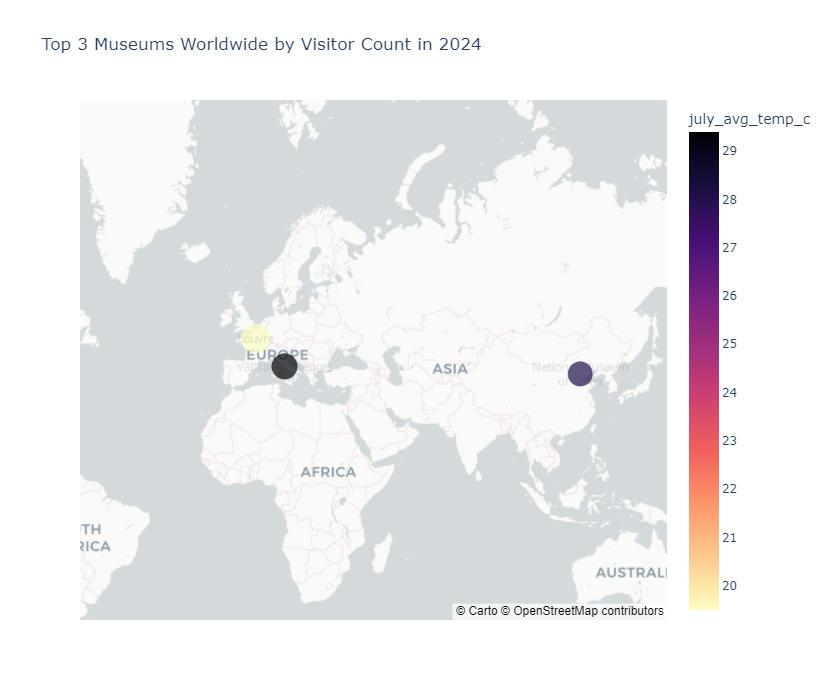

In [14]:
fig = manager_agent.python_executor.state["fig"]
fig.update_layout(width=700, height=700)
fig.show()